# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**TEAM RR15**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

**MindfulMatrics**
 
About MindfulMetrics:

At MindfulMetrics, we are a leading data analytics company specializing in the intersection of renewable energy resource infrastructure investments and data-driven insights. With a strong commitment to sustainability and a passion for harnessing the power of data, we provide cutting-edge solutions and actionable intelligence to drive informed decision-making in the renewable energy sector.

Our Expertise:

With years of experience and a deep understanding of the renewable energy landscape, we have honed our expertise in analysing complex data sets related to renewable energy resources, including solar, wind, hydro, and more. Our team of skilled data scientists, engineers, and industry experts collaborate seamlessly to extract meaningful insights from vast amounts of data, enabling our clients to make strategic and impactful investments in the renewable energy sector.

Data-Driven Insights:

At MindfulMetrics, we believe that data holds the key to unlocking the full potential of renewable energy investments. Our advanced analytics techniques and state-of-the-art tools allow us to identify patterns, trends, and opportunities within diverse data sets. By leveraging the power of predictive modeling, machine learning, and optimization algorithms, we help our clients optimize their investment decisions, enhance operational efficiency, and maximize returns in the renewable energy sector.

Sustainability and Impact:

We are deeply committed to driving positive change through sustainable energy solutions. Our work at MindfulMetrics goes beyond data analysis; we strive to contribute to the global transition towards a greener and more sustainable future. By empowering our clients with data-driven insights, we enable them to make informed choices that align with environmental goals, reduce carbon footprints, and create a lasting impact on our planet.

Collaborative Approach:

At MindfulMetrics, we believe in the power of collaboration. We work closely with our clients, forging strong partnerships built on trust and shared objectives. By understanding our clients' unique needs and challenges, we tailor our analytics solutions to provide personalized recommendations and strategies. Our collaborative approach ensures that our clients receive actionable insights that drive tangible results, fostering long-term success and sustainability.

We are honoured to have you as our valued client at MindfulMetrics. With your trust and partnership, we are committed to delivering exceptional data analytics solutions that drive informed decision-making in renewable energy resource infrastructure investments. Together, we will navigate the complex landscape of sustainability, leveraging our expertise and cutting-edge technologies to maximize the impact and returns of your investments. Thank you for choosing MindfulMetrics, and we look forward to achieving remarkable results together.



<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

**BRIEF EXPLANATION OF THE LIBRARIES USED IN THIS NOTEBOOK**

**Seaborn (sns)**: Seaborn is a data visualization library built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

**Matplotlib.pyplot (plt)**: Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python. The pyplot module provides a convenient interface for creating plots and visualizations.

**Plotly Express (px)**: Plotly Express is a high-level data visualization library that provides easy-to-use functions for creating interactive plots. It is built on top of Plotly, which is a powerful library for creating interactive visualizations.

**Plotly Graph Objects (go)**: Plotly Graph Objects is a lower-level interface for creating interactive plots using Plotly. It provides more control and flexibility compared to Plotly Express.

**Plotly.io (pio)**: Plotly.io is a module in Plotly that provides functions for displaying, saving, and exporting Plotly figures.

**Matplotlib.style (style)**: Matplotlib.style allows you to customize the visual style of your plots. It provides a way to define and use style sheets to create consistent and aesthetically pleasing visualizations.

**Plotly.subplots (make_subplots)**: Plotly.subplots is a module in Plotly that provides functions for creating subplots, which are multiple plots arranged in a grid.

**Scipy.stats (stats)**: Scipy is a scientific computing library in Python, and the stats module within Scipy provides functions for statistical analysis and calculations.

**Pickle**: Pickle is a module in Python for serializing and deserializing Python objects. It allows you to save objects to a file and load them back into memory.

**Numpy (np)**: Numpy is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and a collection of mathematical functions to operate on these arrays.

**Pandas (pd)**: Pandas is a powerful data manipulation and analysis library. It provides data structures like DataFrames for efficient data handling and operations.


In [3]:
# Libraries for data loading, data manipulation and data visulisation
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import matplotlib.style as style
from plotly.subplots import make_subplots
from scipy import stats
import pickle
%matplotlib inline

# Libraries for data preparation and model building
import numpy as np
import pandas as pd

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 50

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Exploratory Data Analysis (EDA) involved examining the data to gain a deep understanding of its characteristics and relationships before applying regression techniques. Through data visualization and analysis, EDA helped us identify variables, their distributions, and potential issues like missing values or outliers. It also facilitated the detection of relationships between independent variables and the dependent variable. EDA guided us through the identification of outliers and the creation of new variables. Furthermore, it allowed for the checking of assumptions and selecting relevant variables for the regression model. Ultimately, EDA provided valuable insights to help us make informed decisions about the data pre-processing, feature engineering, and model selection, enhancing the effectiveness and reliability of advanced regression analysis.

In [3]:
# look at data statistics
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [5]:
df_train.shape

(8763, 49)

Observations: 
 1. We have 49 coloumns and 8763 rows.
 2. There is an Unnamed:0 column that has the same value as the index and is therefore a duplicate. 
    this colunm is insignificant and must be dropped.

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

We have three variables(Seville_pressure,Valencia_wind_deg) that are of categorical data type together with time which is is date-time format, as this is a reggression data, those variables must be converted to numerical.

In [8]:
#Check for null values
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [6]:
# Separate the feature columns according to cities and incorporate the corresponding target variable for each city.
z = df_train.columns.tolist()
barcelona = [i for i in z if i.startswith('Barc')]
bilbao = [i for i in z if i.startswith('Bilb')]
madrid = [i for i in z if i.startswith('Madr')] 
seville = [i for i in z if i.startswith('Sev')]
valencia = [i for i in z if i.startswith('Val')]

In [7]:
#summary for barcelona's statistics 
df_train[barcelona].describe().T

,count,mean,std,min,25%,50%,75%,max
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01
Barcelona_wind_deg,8763.0,190.544848,89.077337,0.000000,118.166667,200.000000,260.000000,3.600000e+02
Barcelona_rain_1h,8763.0,0.128906,0.634730,0.000000,0.000000,0.000000,0.000000,1.200000e+01
Barcelona_pressure,8763.0,1377.964605,14073.140990,670.666667,1014.000000,1018.000000,1022.000000,1.001411e+06
Barcelona_rain_3h,8763.0,0.000439,0.003994,0.000000,0.000000,0.000000,0.000000,9.300000e-02
Barcelona_weather_id,8763.0,765.979687,88.142235,200.666667,800.000000,800.333333,801.000000,8.040000e+02
Barcelona_temp_max,8763.0,291.157644,7.273538,272.150000,285.483333,290.150000,296.855000,3.140767e+02
Barcelona_temp,8763.0,289.855459,6.528111,270.816667,284.973443,289.416667,294.909000,3.073167e+02
Barcelona_temp_min,8763.0,288.447422,6.102593,269.483333,284.150000,288.150000,292.966667,3.048167e+02


array([[<AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>],
       [<AxesSubplot:title={'center':'Barcelona_pressure'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_3h'}>,
        <AxesSubplot:title={'center':'Barcelona_weather_id'}>],
       [<AxesSubplot:title={'center':'Barcelona_temp_max'}>,
        <AxesSubplot:title={'center':'Barcelona_temp'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_min'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

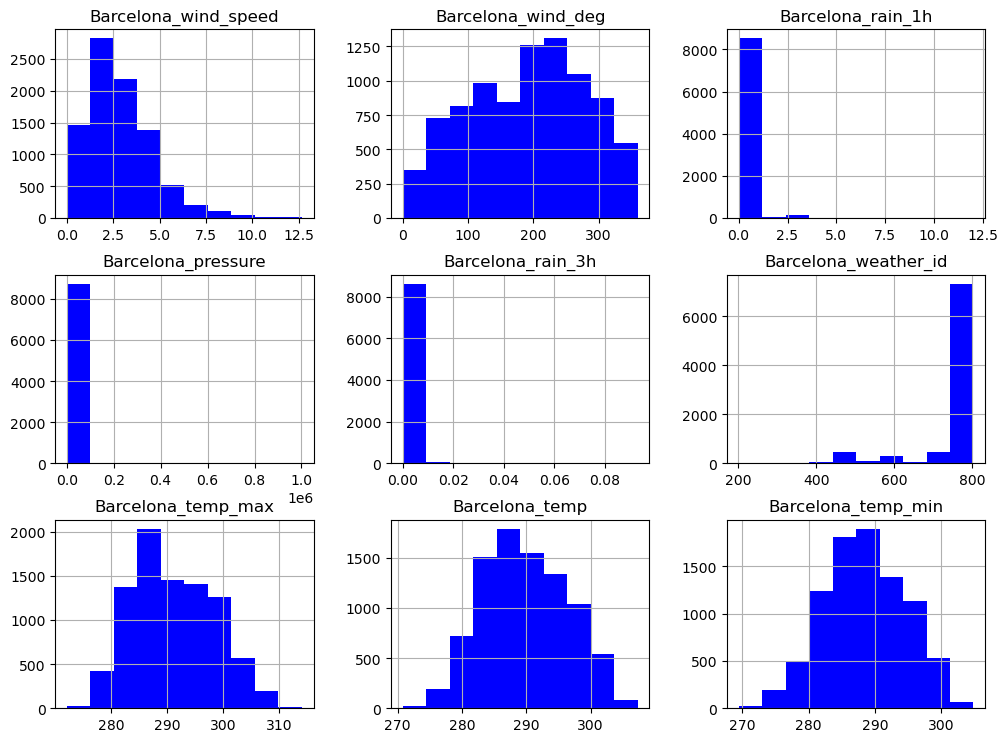

In [8]:
#visual representation 
df_train[barcelona].hist(layout = (4,3), figsize=(12, 12), color='blue')

<AxesSubplot:>

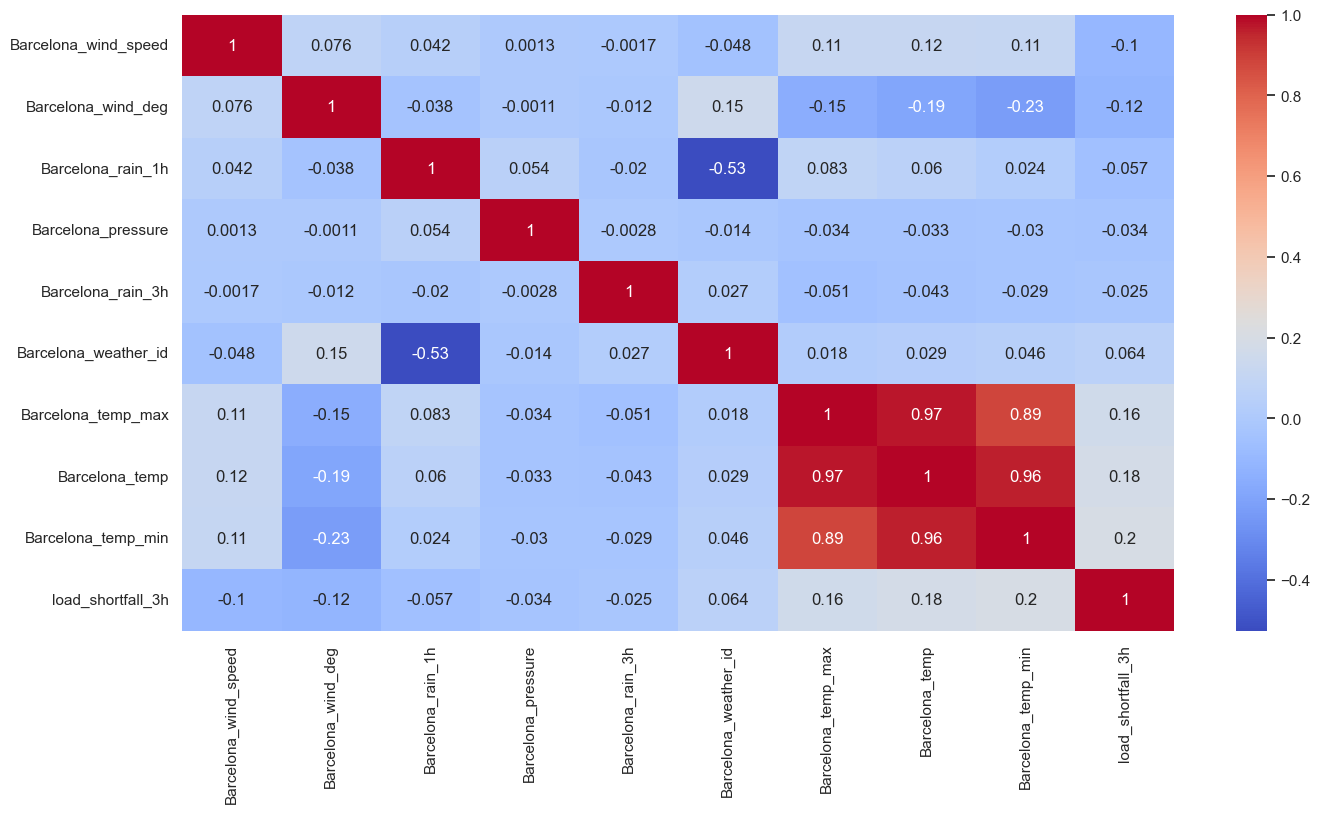

In [9]:
# assess the correlation of the features of the city of Barcelona with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[barcelona + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [10]:
#summary for bilbao's statistics 
df_train[bilbao].describe().T

,count,mean,std,min,25%,50%,75%,max
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,100.000000
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,12.666667
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,359.333333
Bilbao_snow_3h,8763.0,0.031912,0.557264,0.000000,0.000000,0.000000,0.000000,21.300000
Bilbao_pressure,8763.0,1017.739549,10.046124,971.333333,1013.000000,1019.000000,1024.000000,1042.000000
Bilbao_weather_id,8763.0,724.722362,115.846537,207.333333,700.333333,800.000000,801.666667,804.000000
Bilbao_temp_min,8763.0,285.017973,6.705672,264.483333,280.085167,284.816667,289.816667,309.816667
Bilbao_temp,8763.0,286.422929,6.818682,267.483333,281.374167,286.158333,291.034167,310.710000
Bilbao_temp_max,8763.0,287.966027,7.105590,269.063000,282.836776,287.630000,292.483333,317.966667


array([[<AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_speed'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_deg'}>,
        <AxesSubplot:title={'center':'Bilbao_snow_3h'}>,
        <AxesSubplot:title={'center':'Bilbao_pressure'}>],
       [<AxesSubplot:title={'center':'Bilbao_weather_id'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_min'}>,
        <AxesSubplot:title={'center':'Bilbao_temp'}>],
       [<AxesSubplot:title={'center':'Bilbao_temp_max'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

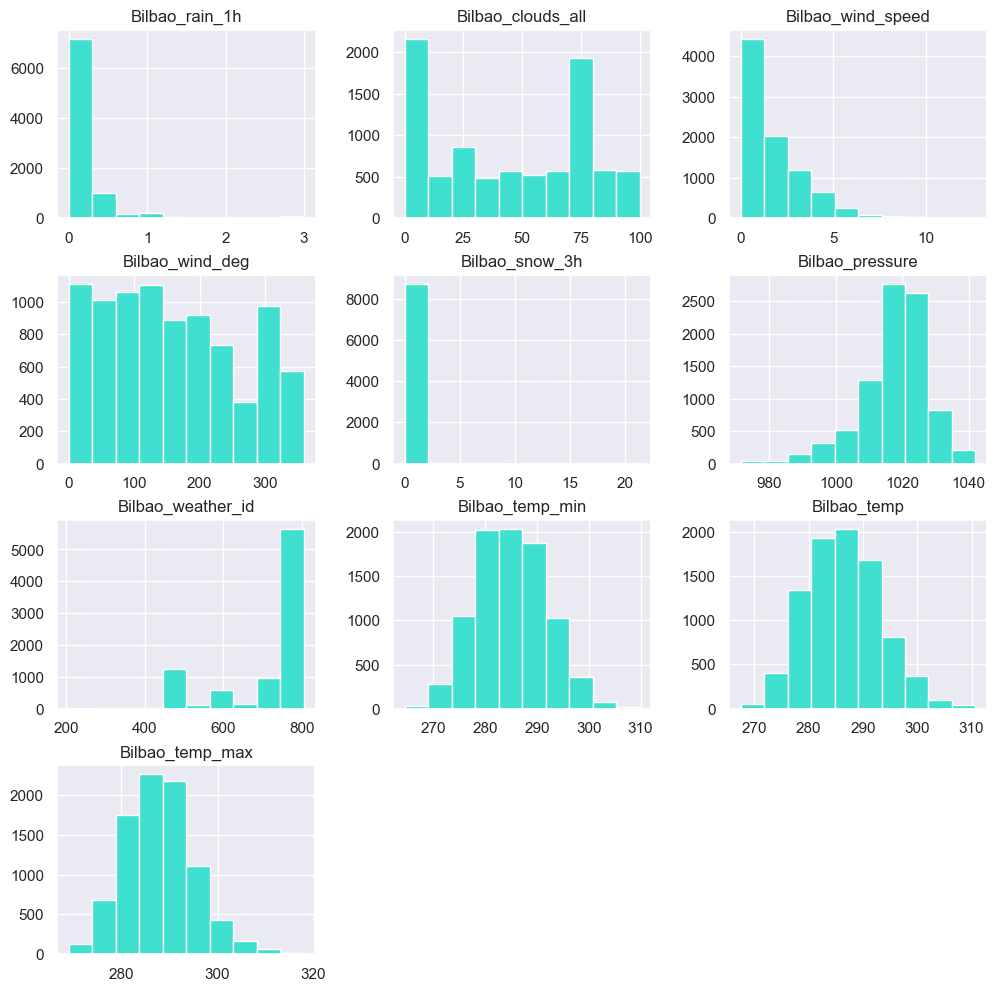

In [12]:
#visual representation of the distribution 
df_train[bilbao].hist(layout = (4,3), figsize=(12, 12), color='Turquoise')

<AxesSubplot:>

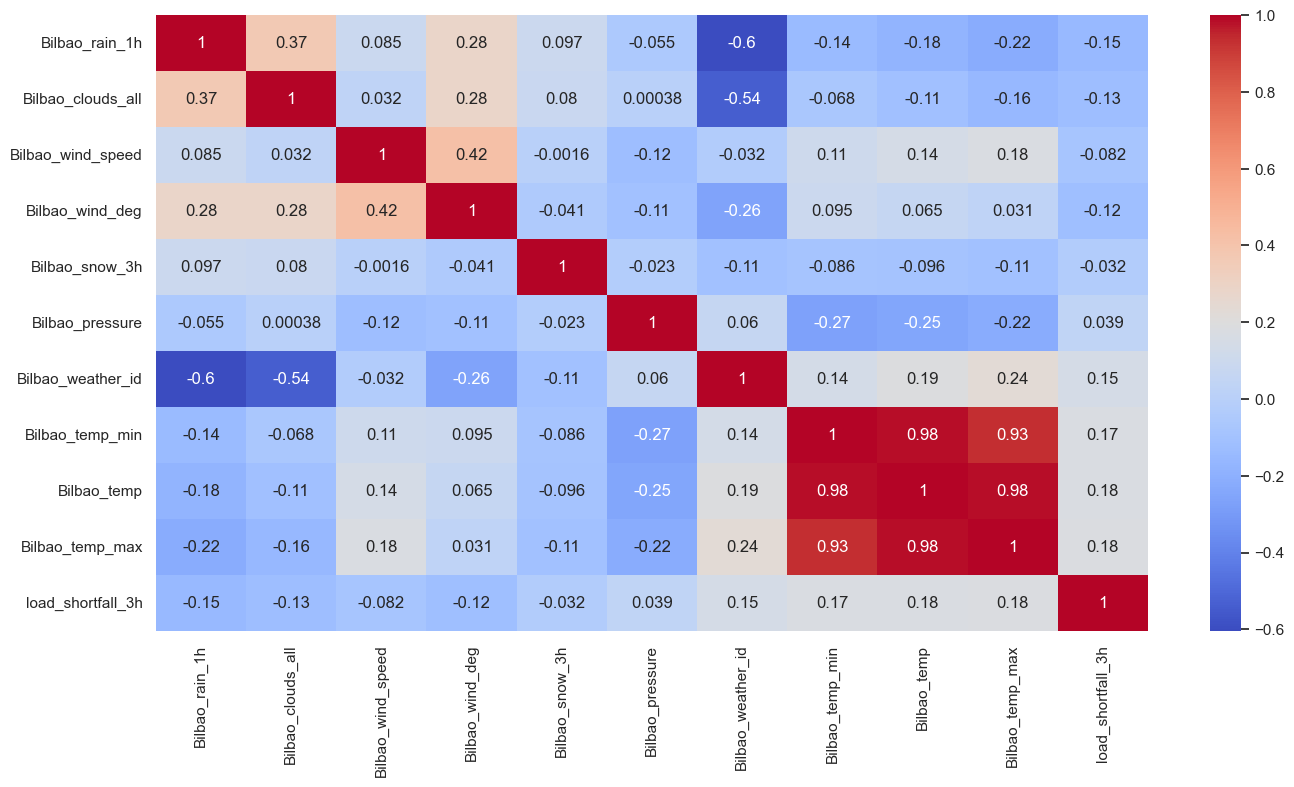

In [13]:
# assess the correlation of the features of the city of Bilbao with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[bilbao + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [14]:
#summary for madrid's statistics 
df_train[madrid].describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,13.000000
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,100.000000
Madrid_clouds_all,8763.0,19.473392,28.053660,0.000000,0.000000,0.000000,33.333333,100.000000
Madrid_rain_1h,8763.0,0.037818,0.152639,0.000000,0.000000,0.000000,0.000000,3.000000
Madrid_weather_id,8763.0,773.527594,77.313315,211.000000,800.000000,800.000000,800.666667,804.000000
Madrid_pressure,8763.0,1010.316920,22.198555,927.666667,1012.333333,1017.333333,1022.000000,1038.000000
Madrid_temp_max,8763.0,289.540309,9.752047,264.983333,282.150000,288.116177,296.816667,314.483333
Madrid_temp,8763.0,288.419439,9.346796,264.983333,281.404281,287.053333,295.154667,313.133333
Madrid_temp_min,8763.0,287.202203,9.206237,264.983333,280.299167,286.083333,293.884500,310.383333


array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>],
       [<AxesSubplot:title={'center':'Madrid_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_weather_id'}>,
        <AxesSubplot:title={'center':'Madrid_pressure'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_max'}>,
        <AxesSubplot:title={'center':'Madrid_temp'}>,
        <AxesSubplot:title={'center':'Madrid_temp_min'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

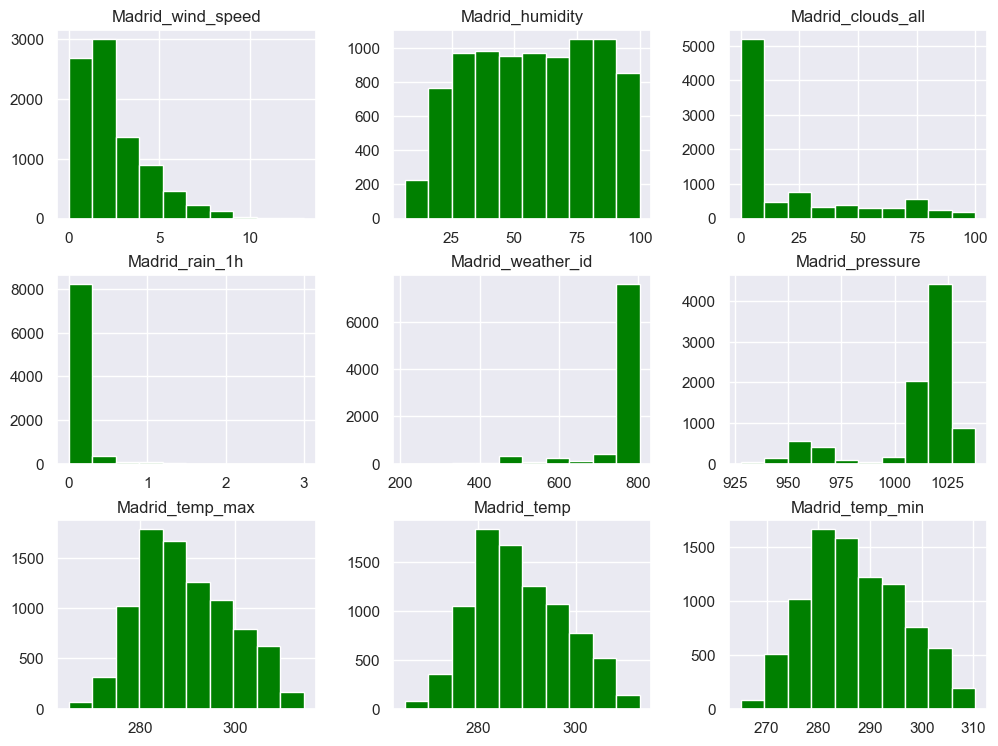

In [15]:
#visual representation of the Distribution 
df_train[madrid].hist(layout = (4,3), figsize=(12, 12), color='green')

<AxesSubplot:>

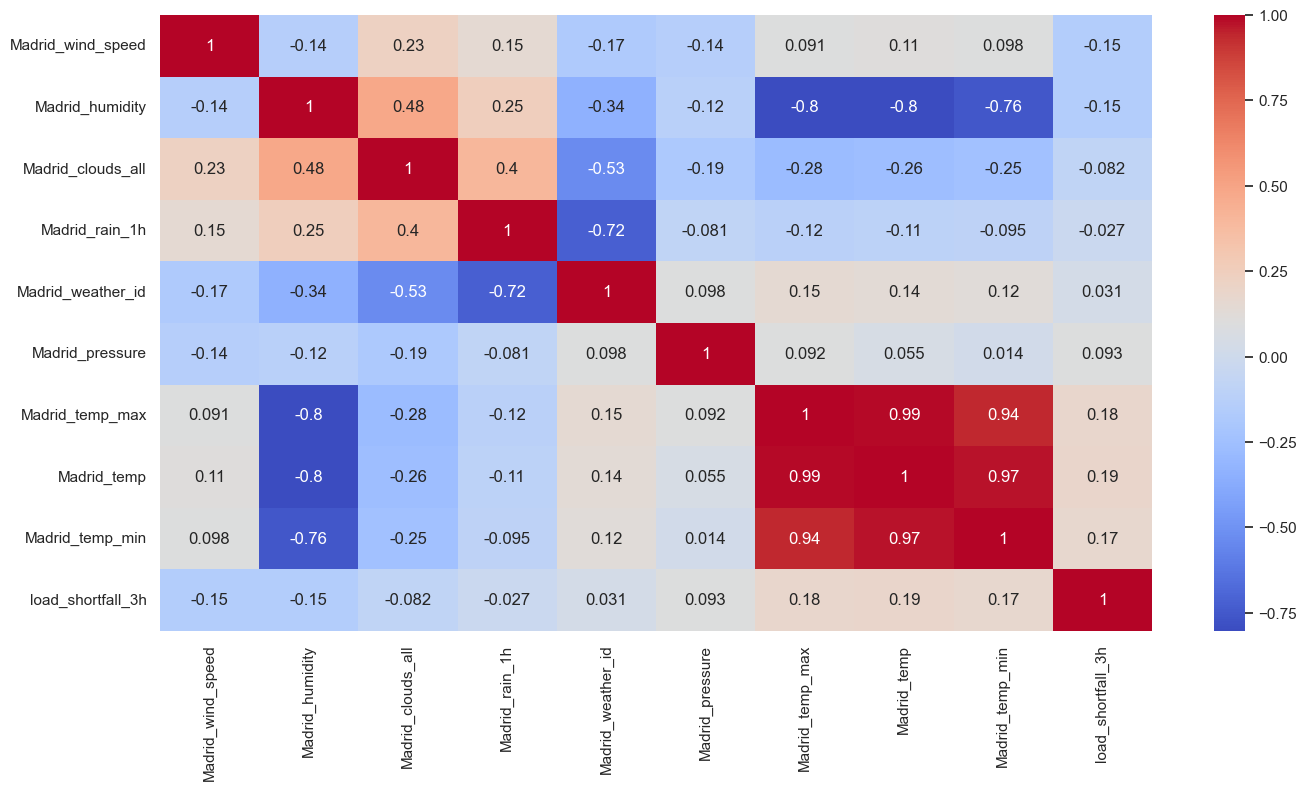

In [17]:
# assess the correlation of the features of the city of Madrid with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[madrid + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [18]:
#summary for seville's statistics 
df_train[seville].describe().T

,count,mean,std,min,25%,50%,75%,max
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,100.000000
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,97.333333
Seville_wind_speed,8763.0,2.425045,1.672895,0.000000,1.000000,2.000000,3.333333,11.666667
Seville_rain_1h,8763.0,0.039439,0.175857,0.000000,0.000000,0.000000,0.000000,3.000000
Seville_rain_3h,8763.0,0.000243,0.003660,0.000000,0.000000,0.000000,0.000000,0.093333
Seville_weather_id,8763.0,774.658818,71.940009,200.000000,800.000000,800.000000,800.000000,804.000000
Seville_temp_max,8763.0,297.479527,8.875812,272.063000,291.312750,297.101667,304.150000,320.483333
Seville_temp,8763.0,293.978903,7.920986,272.063000,288.282917,293.323333,299.620333,314.976667
Seville_temp_min,8763.0,291.633356,8.178220,270.150000,285.816667,290.816667,297.150000,314.816667


array([[<AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Seville_clouds_all'}>,
        <AxesSubplot:title={'center':'Seville_wind_speed'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_rain_3h'}>,
        <AxesSubplot:title={'center':'Seville_weather_id'}>],
       [<AxesSubplot:title={'center':'Seville_temp_max'}>,
        <AxesSubplot:title={'center':'Seville_temp'}>,
        <AxesSubplot:title={'center':'Seville_temp_min'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

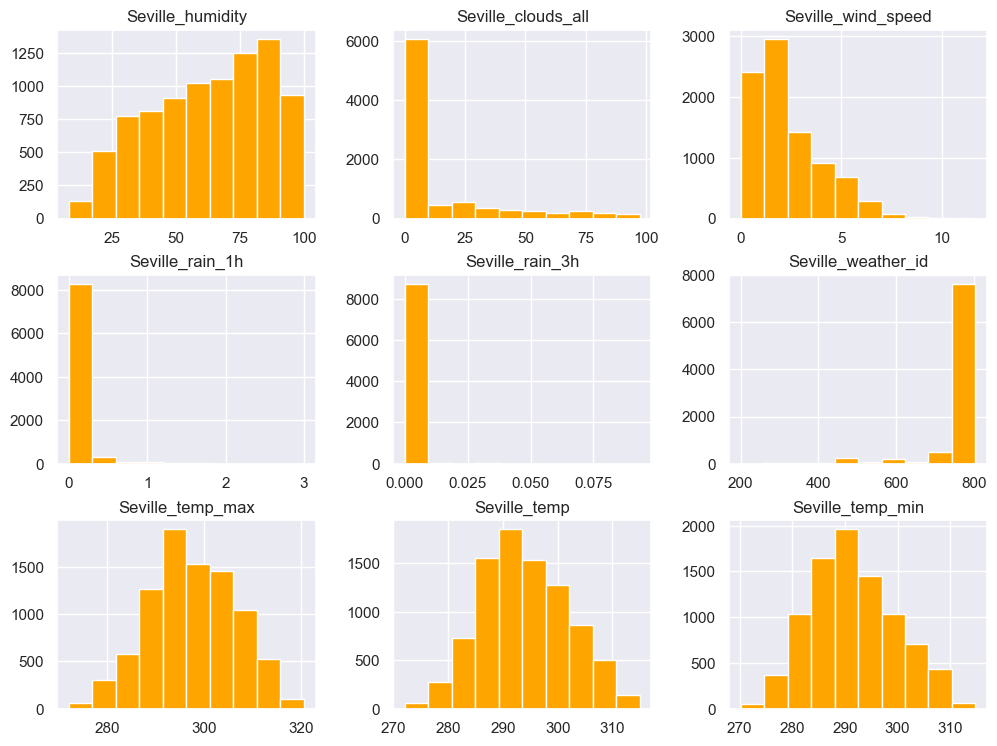

In [19]:
#visual representation of the distribution 
df_train[seville].hist(layout = (4,3), figsize=(12, 12), color='orange')

<AxesSubplot:>

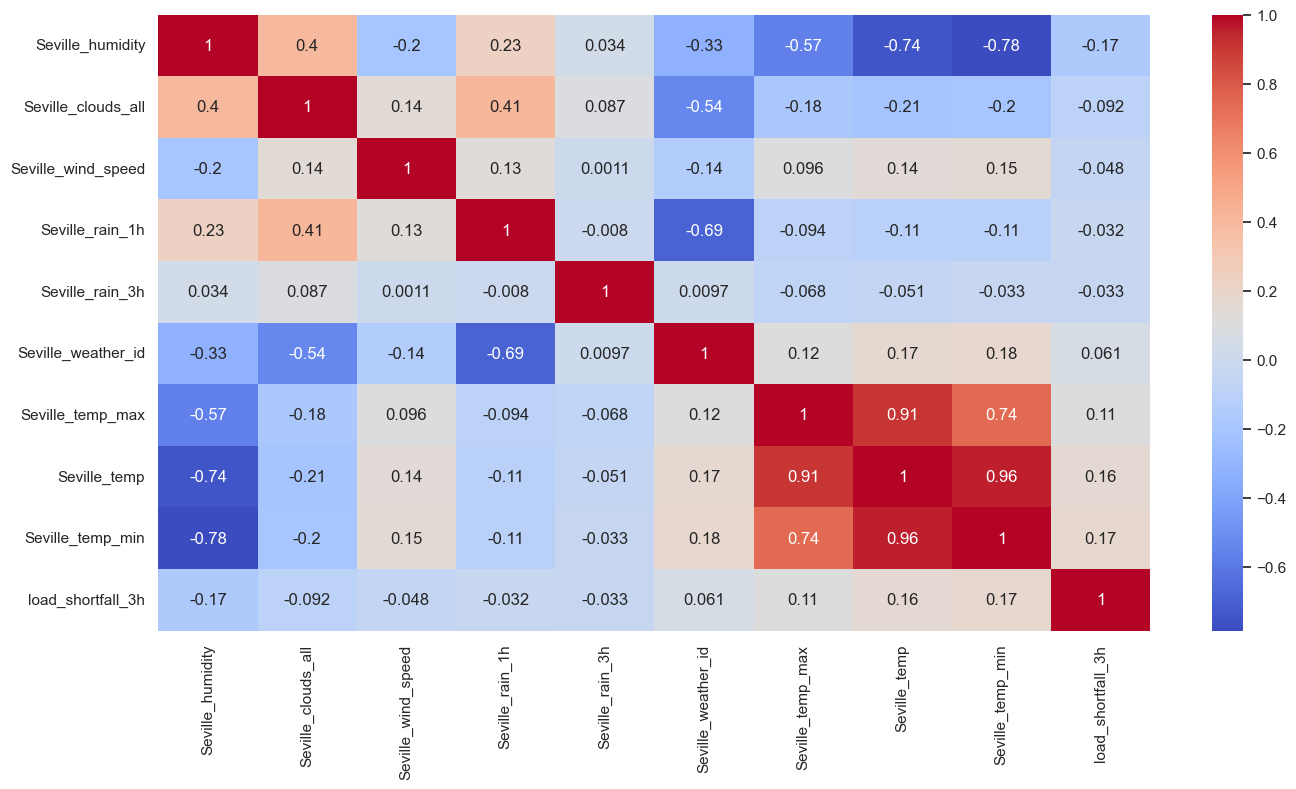

In [20]:
# assess the correlation of the features of the city of Seville with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[seville + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [21]:
#summary for valencia's statistics 
df_train[valencia].describe().T

,count,mean,std,min,25%,50%,75%,max
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,52.000000
Valencia_snow_3h,8763.0,0.000205,0.011866,0.000000,0.000000,0.000000,0.000000,0.791667
Valencia_pressure,6695.0,1012.051407,9.506214,972.666667,1010.333333,1015.000000,1018.000000,1021.666667
Valencia_temp_max,8763.0,291.337233,7.565692,269.888000,285.550167,291.037000,297.248333,314.263333
Valencia_temp,8763.0,290.592152,7.162274,269.888000,285.150000,290.176667,296.056667,310.426667
Valencia_humidity,8763.0,65.247727,19.262322,10.333333,51.333333,67.000000,81.333333,100.000000
Valencia_temp_min,8763.0,289.867648,6.907402,269.888000,284.783333,289.550000,294.820000,310.272000


array([[<AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Valencia_snow_3h'}>,
        <AxesSubplot:title={'center':'Valencia_pressure'}>],
       [<AxesSubplot:title={'center':'Valencia_temp_max'}>,
        <AxesSubplot:title={'center':'Valencia_temp'}>,
        <AxesSubplot:title={'center':'Valencia_humidity'}>],
       [<AxesSubplot:title={'center':'Valencia_temp_min'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

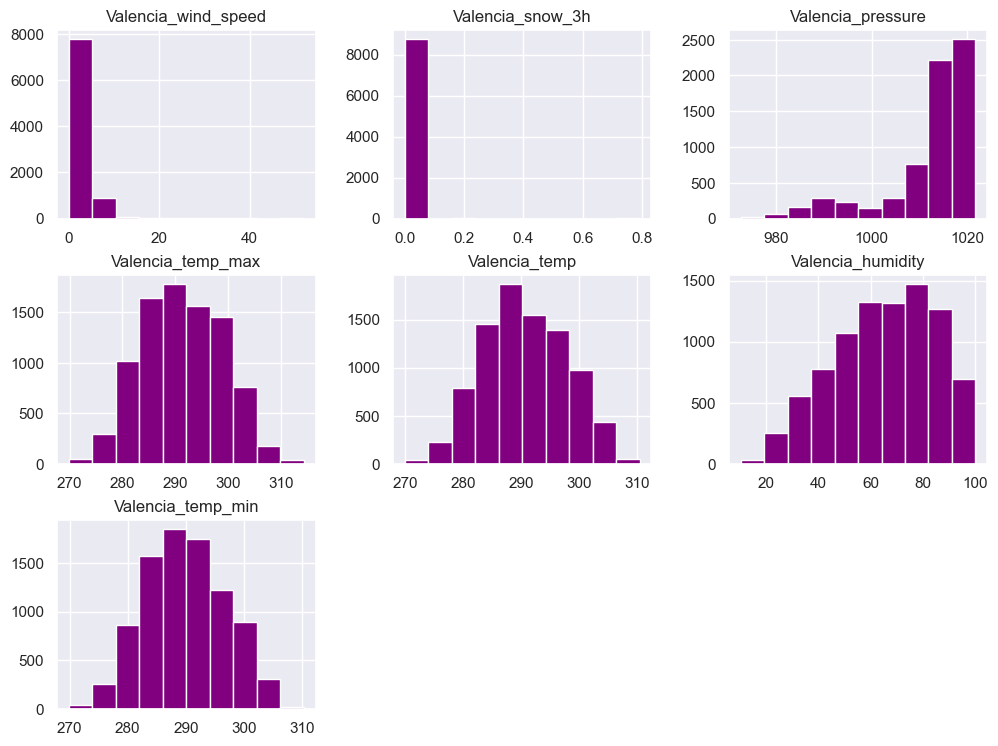

In [22]:
#visual representation of the distribution 
df_train[valencia].hist(layout = (4,3), figsize=(12, 12), color='purple')

<AxesSubplot:>

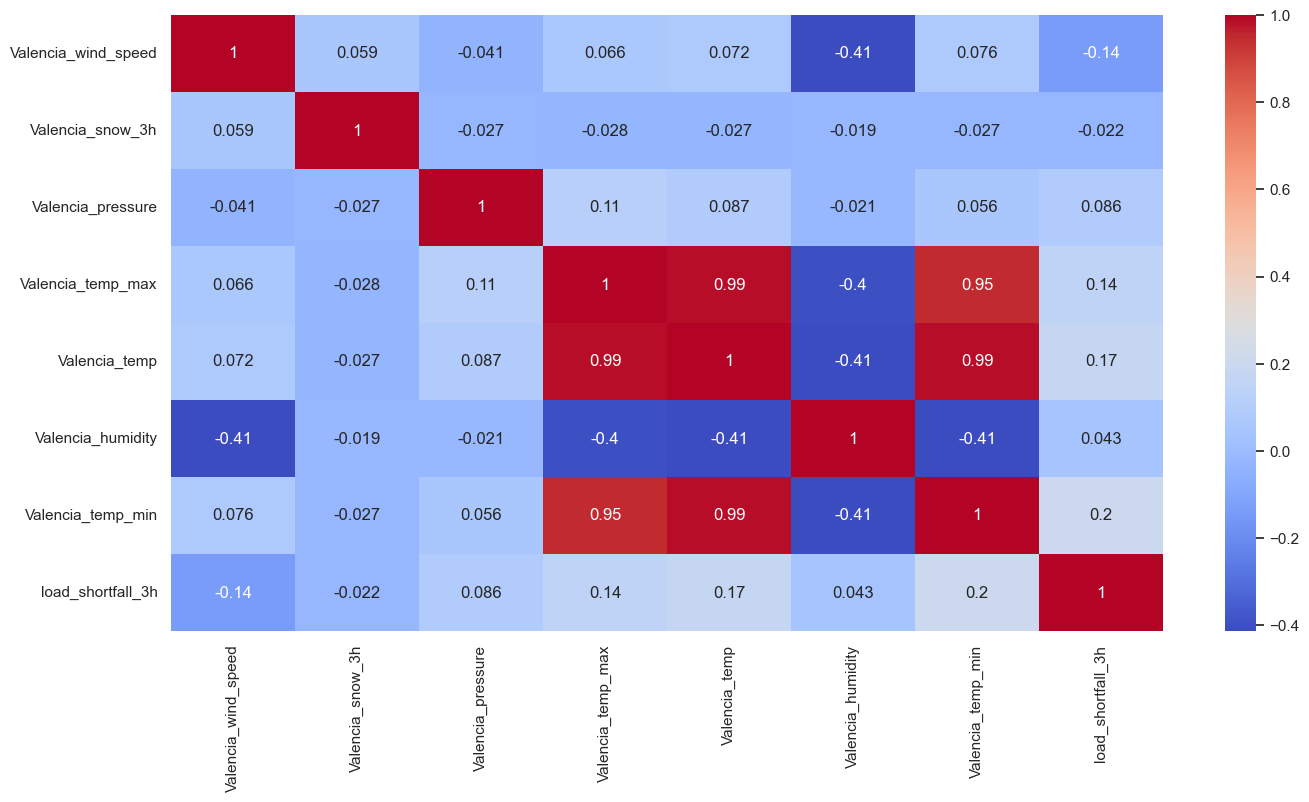

In [23]:
# assess the correlation of the features of the city of Valencia with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[valencia + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Upon examining the data for all five cities, it becomes apparent that the columns demonstrate relatively weak correlation with the target variable. Consequently, it will be necessary to create new columns that could positively influence the target variable, which we do in the feature Engineering section of the notebook. 

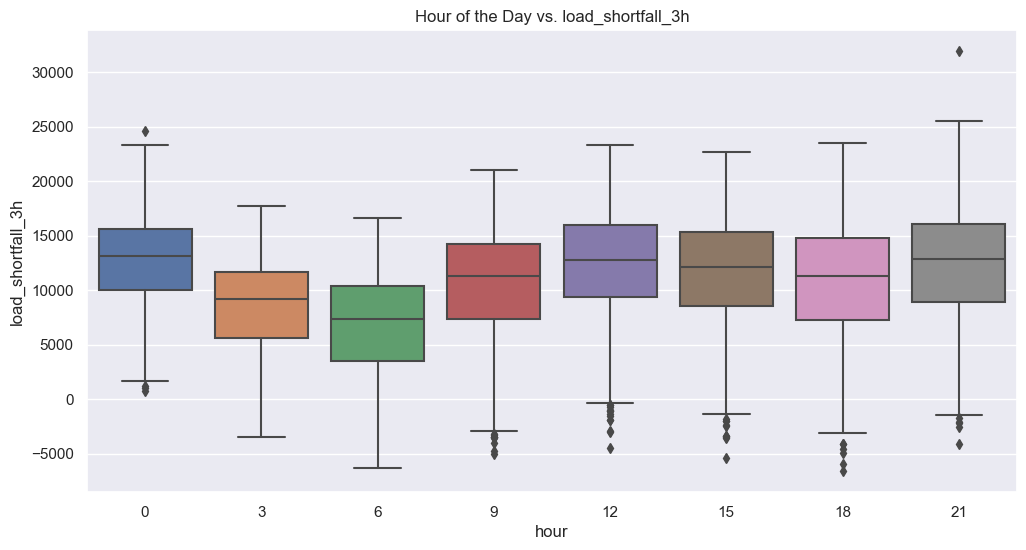

In [24]:
df_train['time'] = pd.to_datetime(df_train['time'])

# Extract the hour of the day and create a new column 'hour'
df_train['hour'] = df_train['time'].dt.hour

# Create a boxplot for 'hour' against the response variable 'load_shortfall_3h'
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='load_shortfall_3h', data=df_train)
plt.title('Hour of the Day vs. load_shortfall_3h')
plt.show()

the boxplot above is Negativly skewed which indicates that there are relatively more low values in the dataset compared to high values.  

<Axes: >

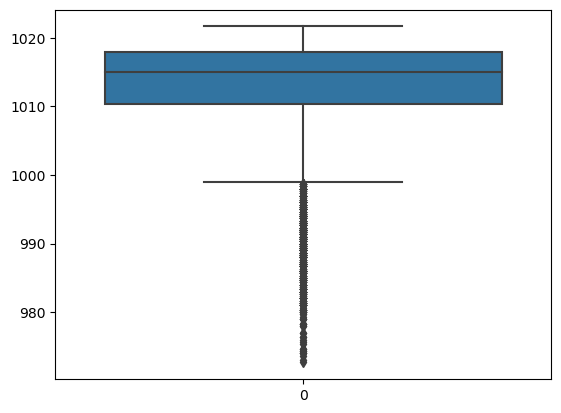

In [9]:
# plot relevant feature interactions
sns.boxplot(df_train['Valencia_pressure'])

The box plot shows "Valencia_pressure" which has a total of 2068 missing values which must be imputed.

In [16]:
df_train=df_train.drop(['Unnamed: 0'],axis=1)

# Checking the Skewness and Kurtosis
Skewness is simply the measure of symmetry or more precisely, the lack of symmetry.

Kurtosis is the measure of how heavy its tails are compared to a normal distribution



C:\Users\ifeoluwa.ayodele\AppData\Local\Temp\ipykernel_226712\2166198397.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.skew(axis=0, skipna=True).plot()


<Axes: >

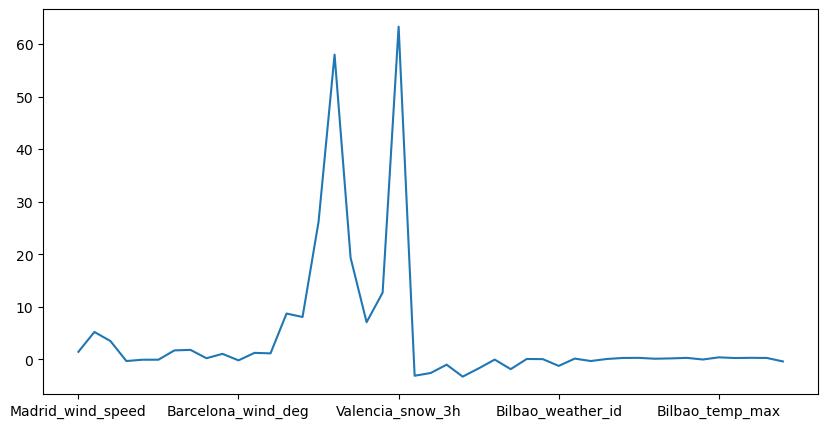

In [11]:
#Skewness to check  for outliers in the different columns
plt.figure(figsize = [10,5])
df_train.skew(axis=0, skipna=True).plot()

In [12]:
df_train.skew()

C:\Users\ifeoluwa.ayodele\AppData\Local\Temp\ipykernel_226712\1035533876.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.skew()


Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

C:\Users\ifeoluwa.ayodele\AppData\Local\Temp\ipykernel_226712\2580010099.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.kurtosis().plot()


<Axes: >

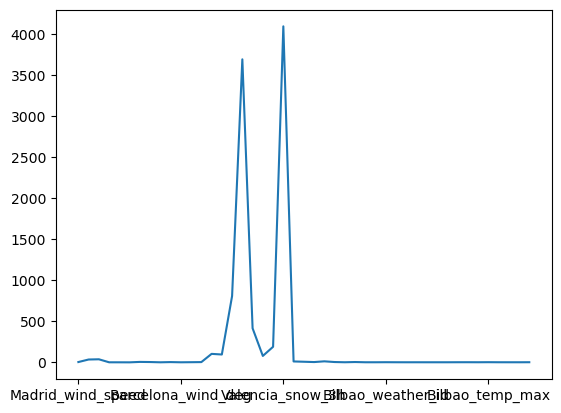

In [13]:
df_train.kurtosis().plot()

In [14]:
df_train.kurtosis()

C:\Users\ifeoluwa.ayodele\AppData\Local\Temp\ipykernel_226712\3332348123.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.kurtosis()


Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

A kurtosis value of > 3 is an indicator that there is a large number of outliers. The following features have a kurtosis > 3 :
Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, 
Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.



# The Correlation between the variables

C:\Users\ifeoluwa.ayodele\AppData\Local\Temp\ipykernel_226712\4290399543.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

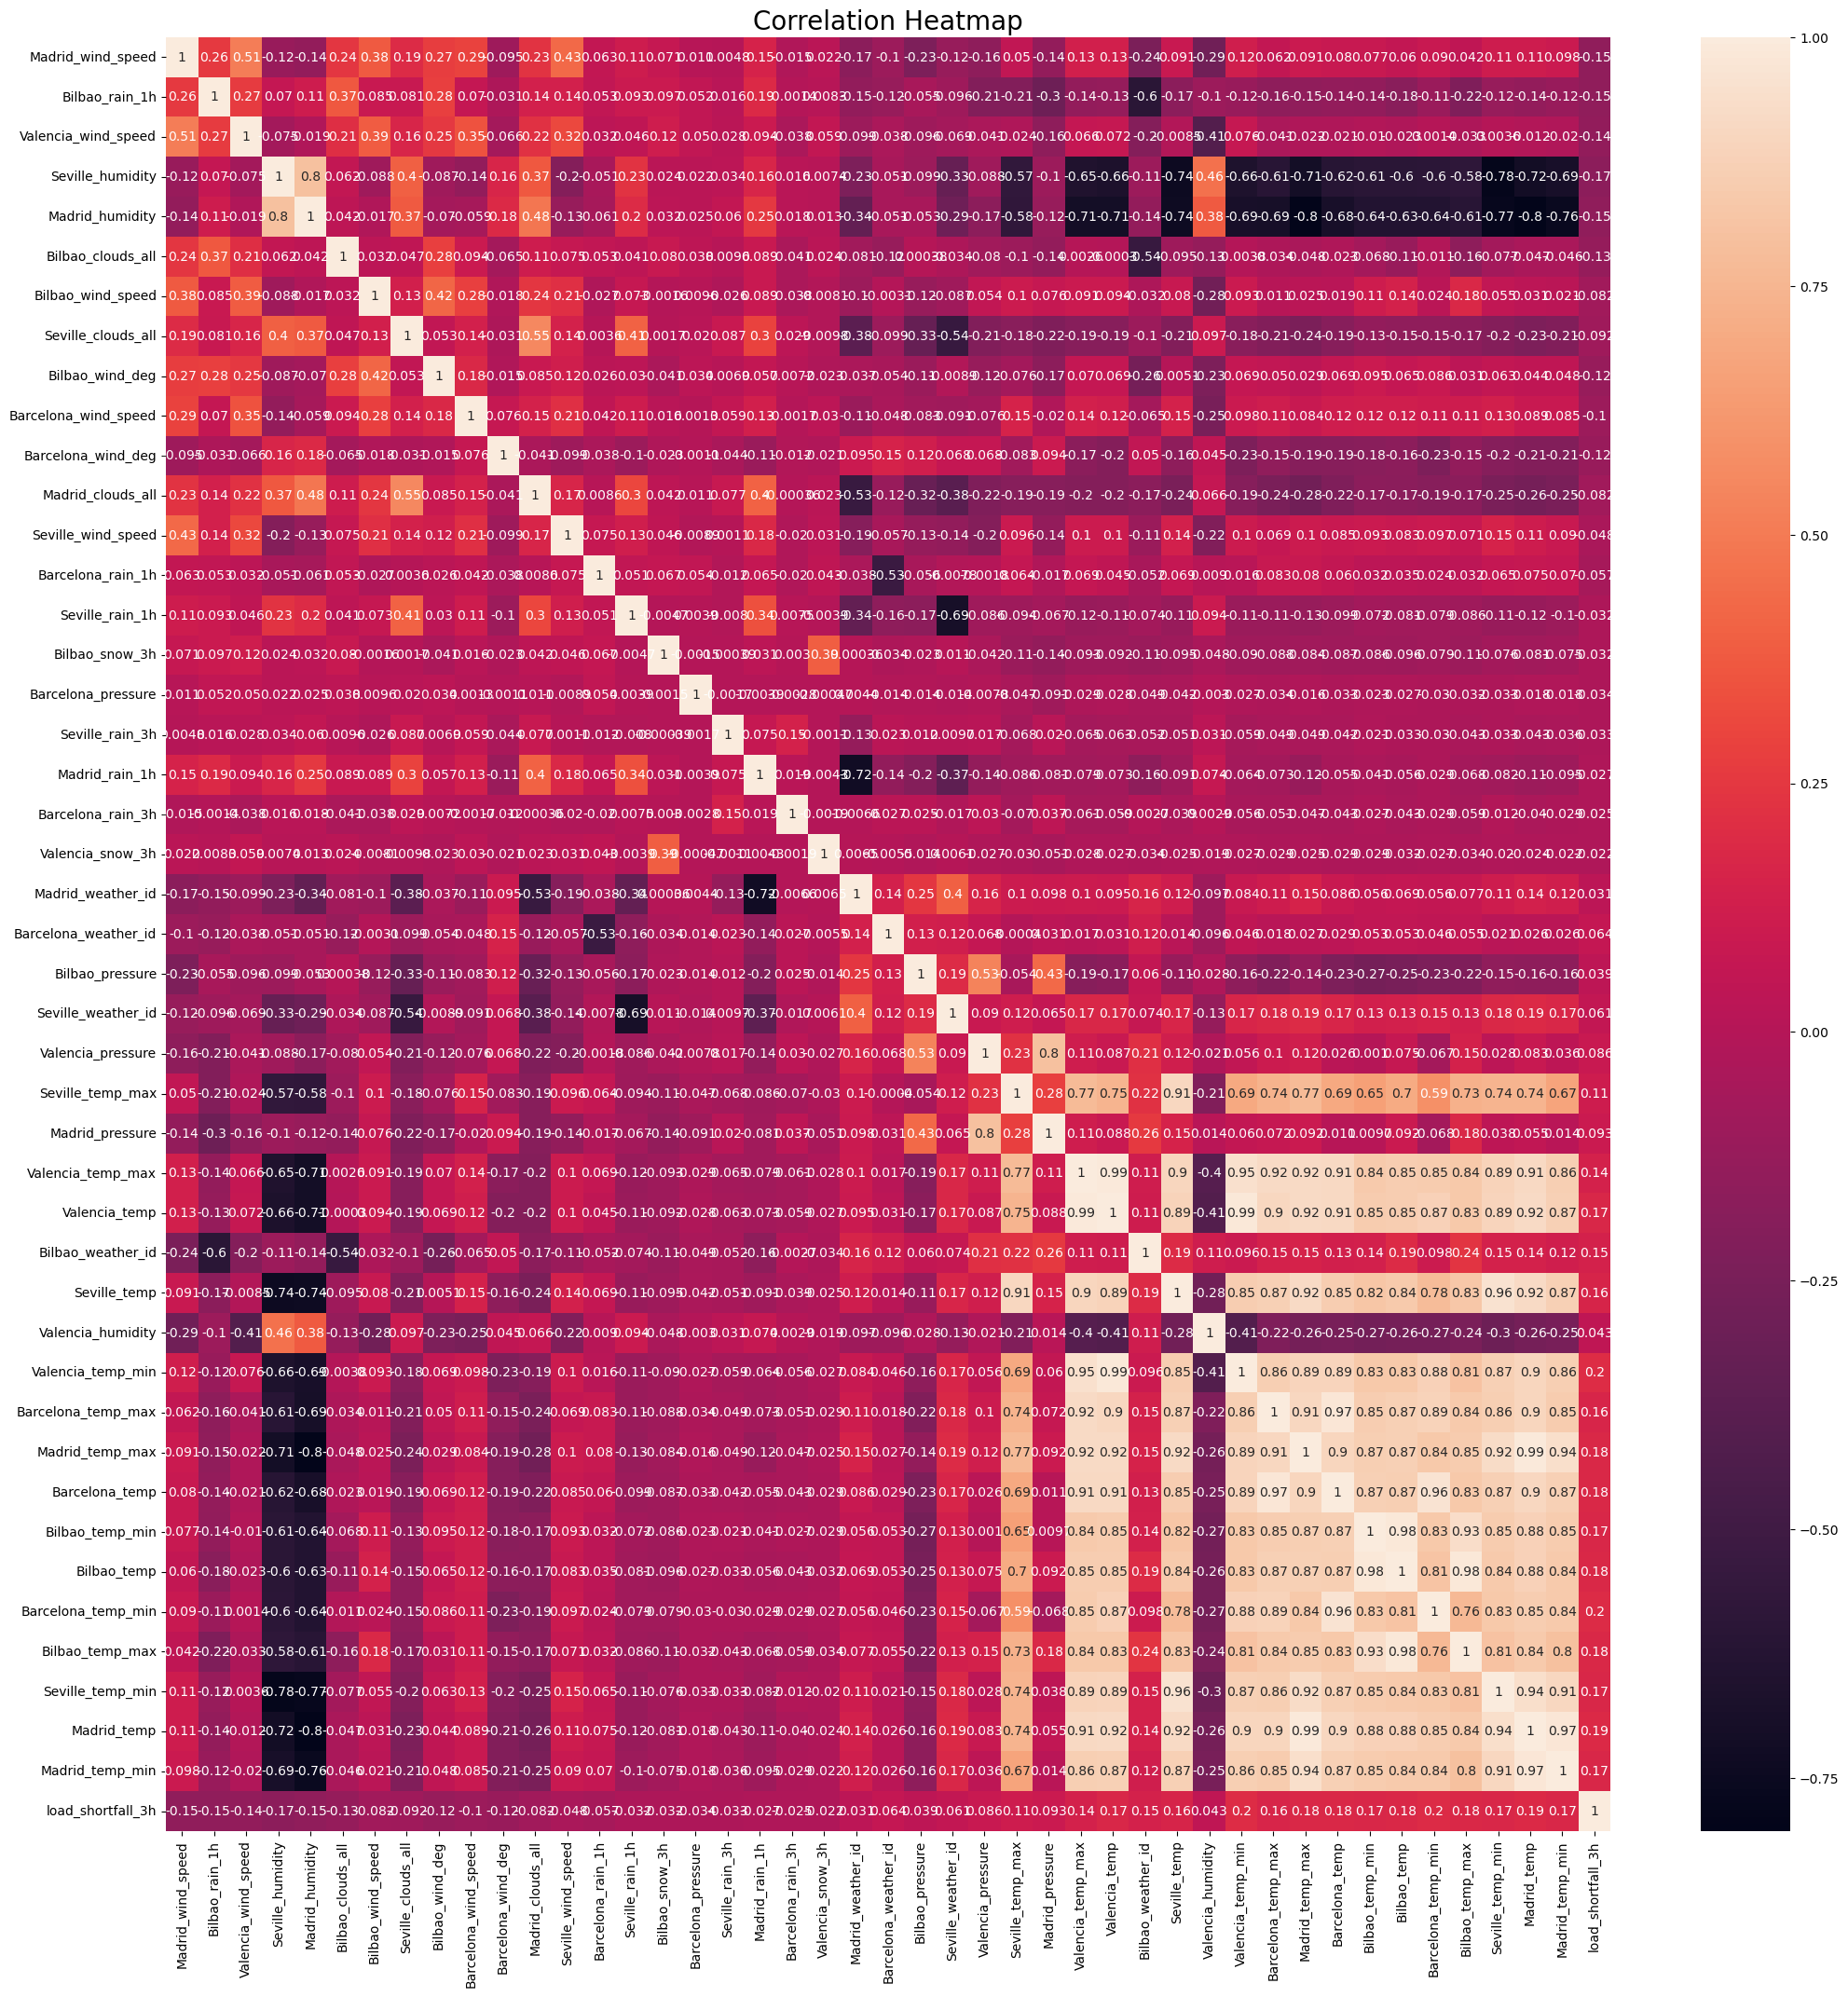

In [15]:
# evaluate correlation
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True) 
plt.title('Correlation Heatmap', fontsize=20)

From our correlation we can see that:
1. There is a presence of high correlation (in red) between features on the heatmap at the bottom right corner of our graph.
2. This high correlation can negatively influence the performance of our models.
3. Correlation is a very important step in choosing the right variables to keep for our model.

# The Distribution of Data

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

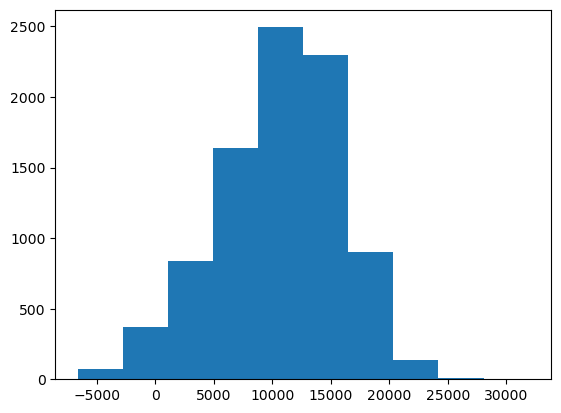

In [16]:
# have a look at Data distribution
plt.hist(df_train['load_shortfall_3h'])

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [17]:
#concatinate test and train for easy data processing

df=pd.concat([df_train,df_test])

df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Unnamed: 0
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,NaN
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,NaN
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,NaN
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,NaN
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,NaN


# Imputation of null values

The null values found in 'Valencia_pressure' were replaced with the Mode.

In [18]:
# remove missing values/ features
df_new=df

#impute null values in Valencia pressure with mode
print('mode')
print(df_new['Valencia_pressure'].mode())
print('median')
print(df_new['Valencia_pressure'].median())
print('mean')
print(df_new['Valencia_pressure'].mean())



mode
0    1018.0
Name: Valencia_pressure, dtype: float64
median
1015.0
mean
1012.3466870428987


In [19]:
# create new features
df_new['Valencia_pressure'] = df_new['Valencia_pressure'].fillna(df_new['Valencia_pressure'].mode()[0])
#convert objects into numeric form


In [20]:
df_new.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

# Creation of new columns: Year, Month, Day and hour from the Date column

The time was split into four columns:Year, Month, Day and hour inorder to convert the time from datetime to a numeric data type.

In [21]:
#Weconverted Date column from object to datetime
df_new['time'] = pd.to_datetime(df_new['time'])

#We created new columns Year, Month, Day and hour from the Date column
df_new['Day'] = df_new['time'].dt.day
df_new['Month'] = df_new['time'].dt.month
df_new['Year'] = df_new['time'].dt.year
df_new['hour'] = df_new['time'].dt.hour
#Then we drop the Date column since we already broke it down to three columns(Year,Month and Day)
df_new.drop(['time'], inplace=True, axis=1)
 

# Correlation between newly created features

The correlation was ran between the newly created columns to check if there is no correlation which will affect the performance of our model.

<Axes: >

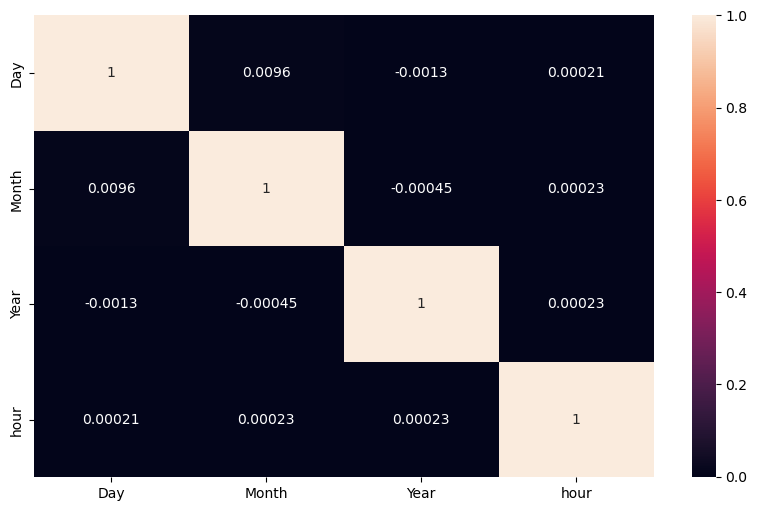

In [22]:
time = df_new.iloc[:,[-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(time.corr(),annot=True )

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     11683 non-null  float64
 1   Valencia_wind_deg     11683 non-null  object 
 2   Bilbao_rain_1h        11683 non-null  float64
 3   Valencia_wind_speed   11683 non-null  float64
 4   Seville_humidity      11683 non-null  float64
 5   Madrid_humidity       11683 non-null  float64
 6   Bilbao_clouds_all     11683 non-null  float64
 7   Bilbao_wind_speed     11683 non-null  float64
 8   Seville_clouds_all    11683 non-null  float64
 9   Bilbao_wind_deg       11683 non-null  float64
 10  Barcelona_wind_speed  11683 non-null  float64
 11  Barcelona_wind_deg    11683 non-null  float64
 12  Madrid_clouds_all     11683 non-null  float64
 13  Seville_wind_speed    11683 non-null  float64
 14  Barcelona_rain_1h     11683 non-null  float64
 15  Seville_pressure    

# Extraction of number from string to for a numeric variable
 
 We extracted the number from the string in 'Valencia_wind_deg' and 'Seville_pressure' inorder to convert them into numeric form.

In [24]:

df_new['Valencia_wind_deg'] = df_new['Valencia_wind_deg'].str.extract('(\d+)')


In [25]:
df_new['Valencia_wind_deg'] 

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [26]:
df_new['Valencia_wind_deg'] = pd.to_numeric(df_new['Valencia_wind_deg'])

In [27]:
df_new['Seville_pressure'] = df_new['Seville_pressure'].str.extract('(\d+)')


In [28]:
df_new['Seville_pressure'] 

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: object

In [29]:
df_new['Seville_pressure'] = pd.to_numeric(df_new['Seville_pressure'])

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     11683 non-null  float64
 1   Valencia_wind_deg     11683 non-null  int64  
 2   Bilbao_rain_1h        11683 non-null  float64
 3   Valencia_wind_speed   11683 non-null  float64
 4   Seville_humidity      11683 non-null  float64
 5   Madrid_humidity       11683 non-null  float64
 6   Bilbao_clouds_all     11683 non-null  float64
 7   Bilbao_wind_speed     11683 non-null  float64
 8   Seville_clouds_all    11683 non-null  float64
 9   Bilbao_wind_deg       11683 non-null  float64
 10  Barcelona_wind_speed  11683 non-null  float64
 11  Barcelona_wind_deg    11683 non-null  float64
 12  Madrid_clouds_all     11683 non-null  float64
 13  Seville_wind_speed    11683 non-null  float64
 14  Barcelona_rain_1h     11683 non-null  float64
 15  Seville_pressure    

In [31]:
df_new=df_new.drop(['Unnamed: 0'],axis=1)

# Reordering the dataframe

In [32]:
#before we model, let's reorder columns so that our dependent variable 'load_shortfall_3h' is the last column of the dataaframe

column_titles = [col for col in df_new.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_new = df_new.reindex(columns=column_titles)

Let's find some correlation between the dependent variables

In [33]:
#now let's see correlation

df_new.corr()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,hour,load_shortfall_3h
Madrid_wind_speed,1.000000,0.112011,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,...,0.059285,0.020677,0.077828,0.078077,0.064200,-0.038722,-0.235733,-0.011580,0.188118,-0.150981
Valencia_wind_deg,0.112011,1.000000,0.174800,0.270834,0.276979,0.291152,0.143733,0.071520,0.082175,0.113183,...,-0.277645,-0.308790,-0.346848,-0.364499,-0.345021,-0.025827,-0.109152,0.062176,-0.171907,-0.188674
Bilbao_rain_1h,0.247761,0.174800,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,...,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395,0.057068,-0.177464,-0.191407,0.039779,-0.152510
Valencia_wind_speed,0.524549,0.270834,0.240118,1.000000,-0.095533,-0.029066,0.192272,0.398683,0.146475,0.255511,...,0.005129,-0.024867,0.002894,-0.012830,-0.024767,-0.009837,-0.233550,0.054423,0.212418,-0.142791
Seville_humidity,-0.114347,0.276979,0.063048,-0.095533,1.000000,0.794435,0.055132,-0.096654,0.397249,-0.118299,...,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070,0.024934,-0.087993,0.041900,-0.432221,-0.167290
Madrid_humidity,-0.116172,0.291152,0.098192,-0.029066,0.794435,1.000000,0.033094,-0.012729,0.363340,-0.091650,...,-0.636039,-0.590620,-0.764148,-0.795066,-0.757692,0.016621,-0.063884,0.025770,-0.313369,-0.150536
Bilbao_clouds_all,0.225566,0.143733,0.361385,0.192272,0.055132,0.033094,1.000000,0.024394,0.037675,0.267920,...,-0.025979,-0.170196,-0.089831,-0.059928,-0.060271,0.028425,-0.136215,-0.018802,-0.022151,-0.127293
Bilbao_wind_speed,0.382617,0.071520,0.075120,0.398683,-0.096654,-0.012729,0.024394,1.000000,0.132678,0.440740,...,0.016688,0.166347,0.047191,0.019764,0.006009,-0.029415,-0.096566,0.130914,0.206420,-0.081602
Seville_clouds_all,0.185177,0.082175,0.074137,0.146475,0.397249,0.363340,0.037675,0.132678,1.000000,0.042427,...,-0.150584,-0.152165,-0.194561,-0.222425,-0.213539,-0.014268,-0.147646,-0.024476,-0.017705,-0.091804
Bilbao_wind_deg,0.272466,0.113183,0.255858,0.255511,-0.118299,-0.091650,0.267920,0.440740,0.042427,1.000000,...,0.094344,0.052073,0.080600,0.063938,0.062808,0.024520,-0.165337,-0.045667,0.143949,-0.120800


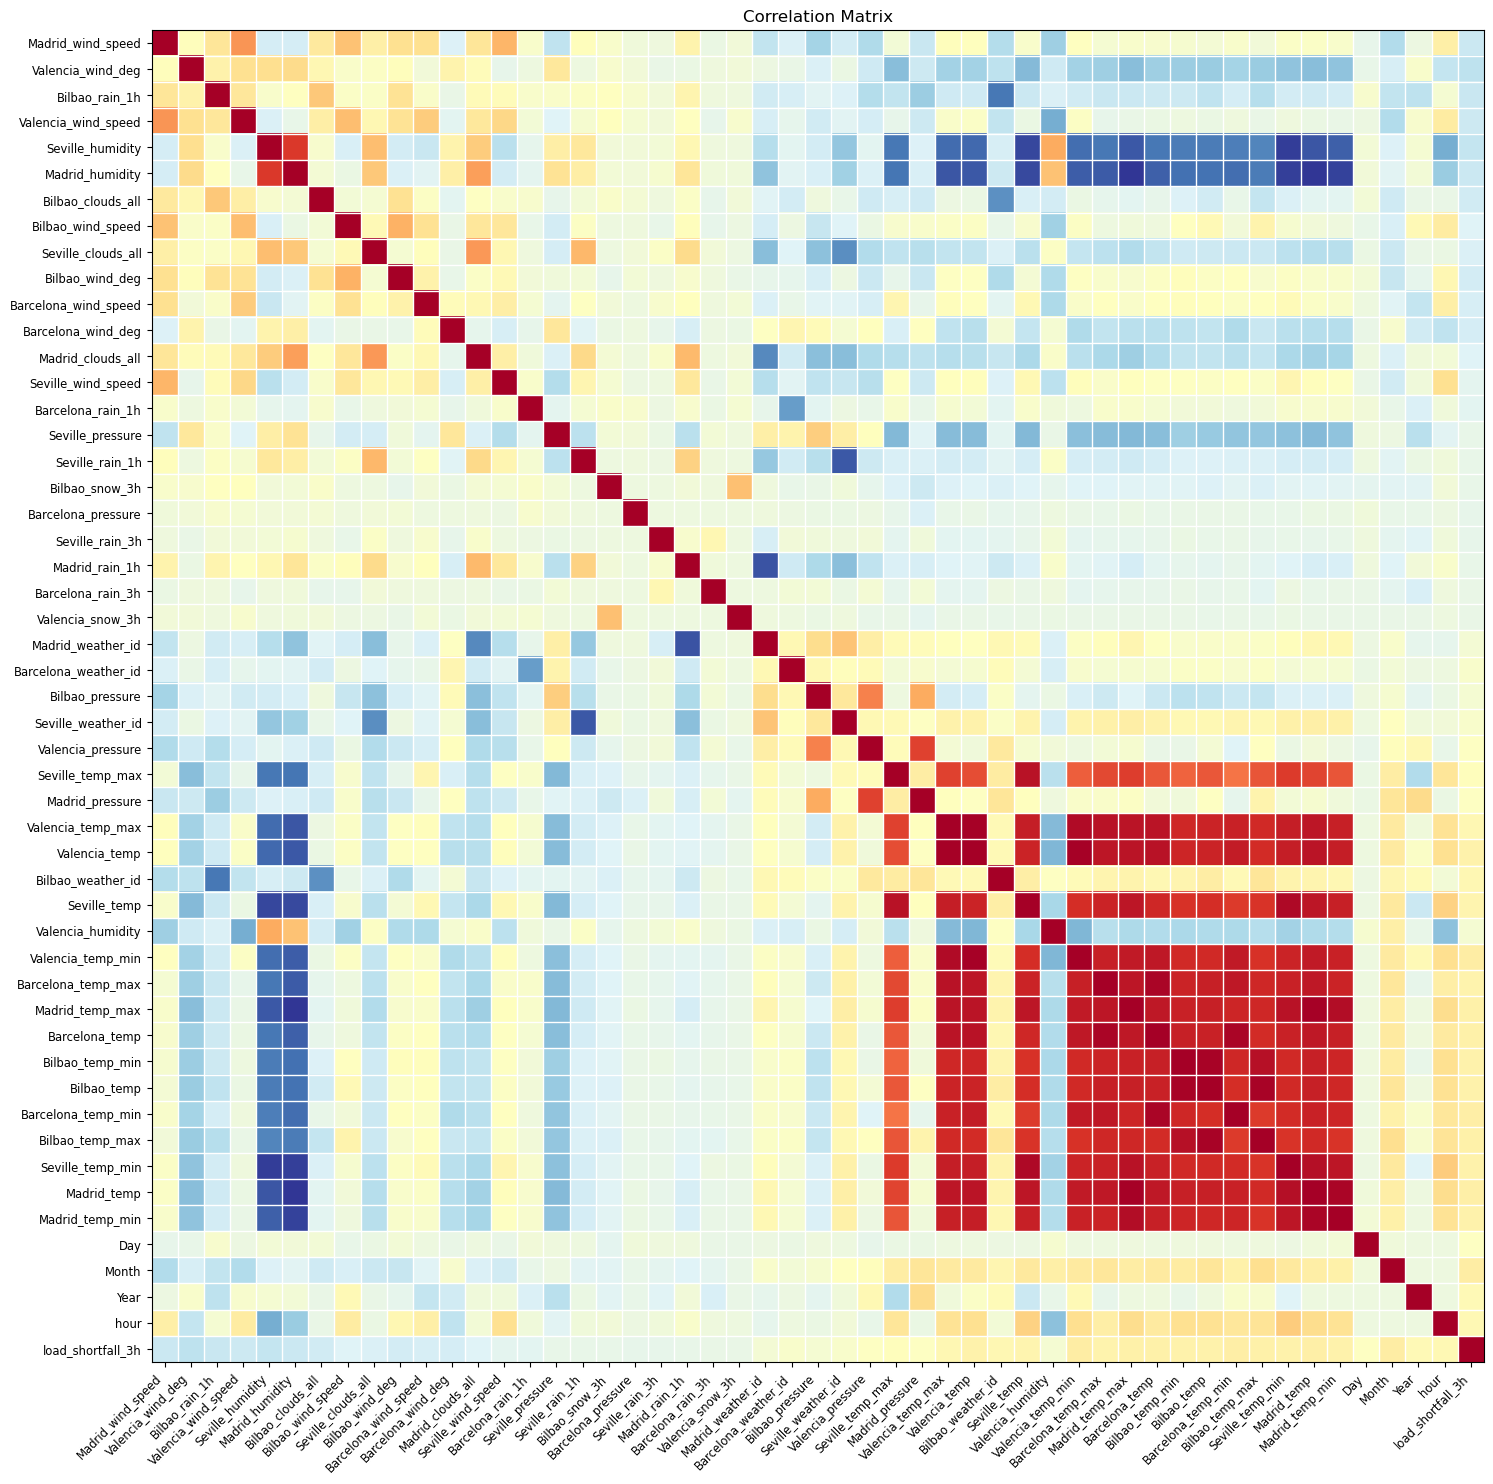

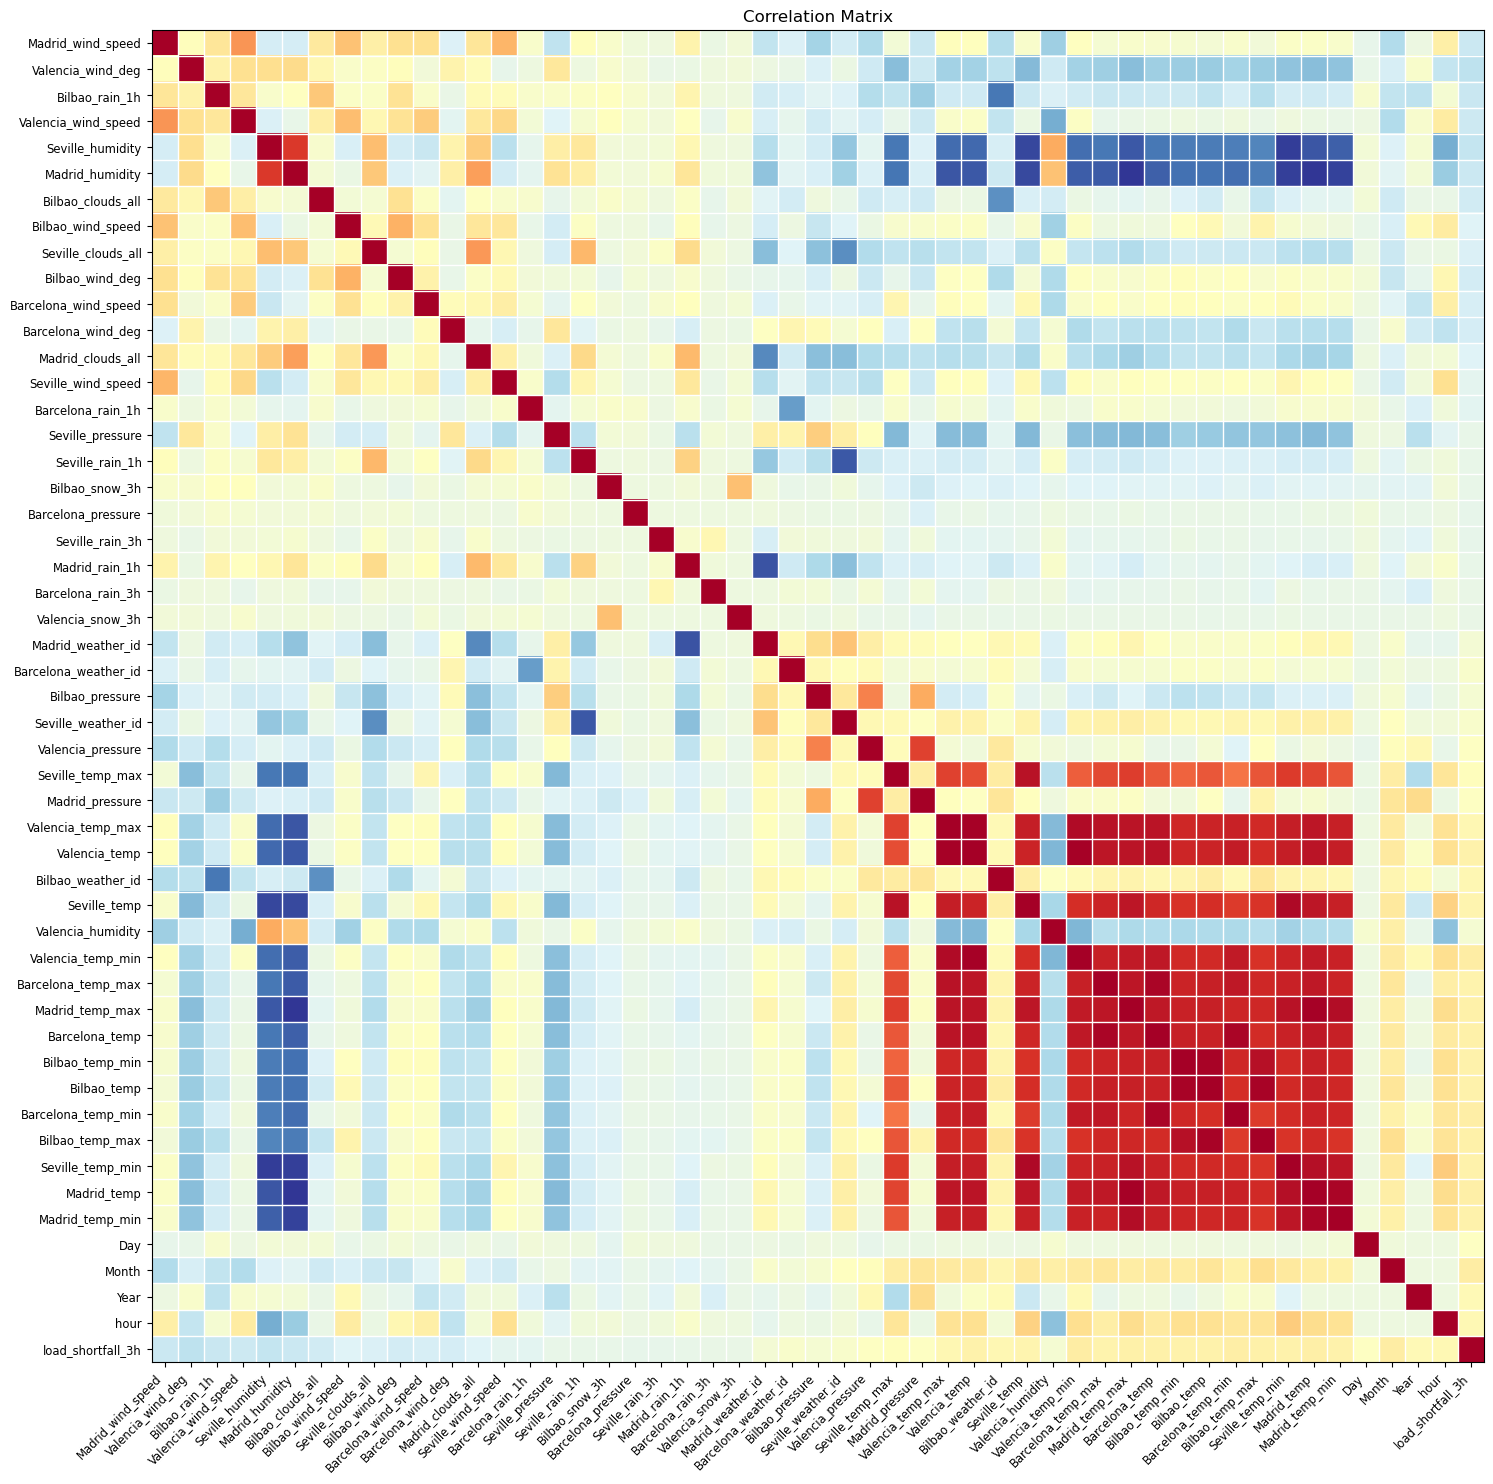

In [34]:
from statsmodels.graphics.correlation import plot_corr
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
plot_corr(df_new.corr(), xnames=df_new.corr().columns, ax=ax)

In [35]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = df_new.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Valencia_wind_deg + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_pressure + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Day + Month + Year + hour


In [36]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     38.32
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        16:12:08   Log-Likelihood:                -86573.
No. Observations:                8763   AIC:                         1.732e+05
Df Residuals:                    8712   BIC:                         1.736e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.329e+05 

In [37]:
# Calculate correlations between predictor variables and the response variable
corrs = df_new.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [38]:
df_new.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

In [39]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col != 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df_new[:len(df_train)].drop('load_shortfall_3h', axis=1)[col], df_train['load_shortfall_3h'])[1], 6)
    dict_cp[col] = {'Correlation_Coefficient': corrs[col],
                    'P_Value': p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value'] < 0.1]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
Valencia_pressure,0.090405,0.000000
Barcelona_weather_id,0.063868,0.000000
Seville_weather_id,0.061104,0.000000
Seville_humidity,-0.167290,0.000000
Barcelona_rain_1h,-0.056633,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Madrid_clouds_all,-0.081623,0.000000
Day,0.092116,0.000000
Seville_clouds_all,-0.091804,0.000000


In [40]:
# The dependent variable remains the same:
y_data = df_new[y_name]  # y_name = 'load_shortfall_3h'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_new[X_names]

In [41]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr)>0.9]

,Valencia_temp_min,Month,Barcelona_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Bilbao_temp_max,Bilbao_temp,Madrid_temp_min,Seville_temp_min,...,Barcelona_wind_speed,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Valencia_wind_speed,Madrid_humidity,Madrid_wind_speed,Bilbao_rain_1h,Seville_humidity,Valencia_wind_deg
Valencia_temp_min,1.000000,NaN,NaN,NaN,0.905283,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona_temp_min,NaN,NaN,1.000000,NaN,0.972538,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_temp,NaN,NaN,NaN,1.000000,0.908504,0.990703,NaN,NaN,0.978677,0.937541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona_temp,0.905283,NaN,0.972538,0.908504,1.000000,0.905429,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_temp_max,NaN,NaN,NaN,0.990703,0.905429,1.000000,NaN,NaN,0.950082,0.925381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_temp_max,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.981878,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_temp,NaN,NaN,NaN,NaN,NaN,NaN,0.981878,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_temp_min,NaN,NaN,NaN,0.978677,NaN,0.950082,NaN,NaN,1.000000,0.911220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_temp_min,NaN,NaN,NaN,0.937541,NaN,0.925381,NaN,NaN,0.911220,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Barcelona_temp,Valencia_temp,Valencia_temp_max,Barcelona_temp,Barcelona_temp_max,Barcelona_temp,Madrid_temp_max,Madrid_temp_min,Seville_temp_min,Valencia_temp,...,Madrid_temp_max,Seville_temp_min,Seville_temp_max,Valencia_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Valencia_temp,Barcelona_temp_max,Seville_temp
Valencia_temp_min,0.905283,0.988047,0.956864,0.905283,0.876706,0.905283,0.895486,0.868788,0.862583,0.988047,...,0.895486,0.862583,0.677777,1.000000,0.899039,0.905283,0.895486,0.988047,0.876706,0.829976
Valencia_temp_min,0.905283,0.988047,0.956864,0.905283,0.876706,0.905283,0.895486,0.868788,0.862583,0.988047,...,0.895486,0.862583,0.677777,1.000000,0.899039,0.905283,0.895486,0.988047,0.876706,0.829976
Valencia_temp_min,0.905283,0.988047,0.956864,0.905283,0.876706,0.905283,0.895486,0.868788,0.862583,0.988047,...,0.895486,0.862583,0.677777,1.000000,0.899039,0.905283,0.895486,0.988047,0.876706,0.829976
Barcelona_temp_min,0.972538,0.893376,0.867774,0.972538,0.908641,0.972538,0.853428,0.854083,0.834729,0.893376,...,0.853428,0.834729,0.613980,0.898245,0.867627,0.972538,0.853428,0.893376,0.908641,0.784116
Barcelona_temp_min,0.972538,0.893376,0.867774,0.972538,0.908641,0.972538,0.853428,0.854083,0.834729,0.893376,...,0.853428,0.834729,0.613980,0.898245,0.867627,0.972538,0.853428,0.893376,0.908641,0.784116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valencia_temp_max,0.920304,0.989145,1.000000,0.920304,0.925159,0.920304,0.920765,0.875728,0.884222,0.989145,...,0.920765,0.884222,0.762325,0.956864,0.915525,0.920304,0.920765,0.989145,0.925159,0.880606
Valencia_temp_max,0.920304,0.989145,1.000000,0.920304,0.925159,0.920304,0.920765,0.875728,0.884222,0.989145,...,0.920765,0.884222,0.762325,0.956864,0.915525,0.920304,0.920765,0.989145,0.925159,0.880606
Valencia_temp_max,0.920304,0.989145,1.000000,0.920304,0.925159,0.920304,0.920765,0.875728,0.884222,0.989145,...,0.920765,0.884222,0.762325,0.956864,0.915525,0.920304,0.920765,0.989145,0.925159,0.880606
Valencia_temp_max,0.920304,0.989145,1.000000,0.920304,0.925159,0.920304,0.920765,0.875728,0.884222,0.989145,...,0.920765,0.884222,0.762325,0.956864,0.915525,0.920304,0.920765,0.989145,0.925159,0.880606


In [43]:
# Lets take a new subset of our potential independent variables
X_remove = ['Valencia_temp_min','Barcelona_temp_min','Madrid_temp_max','Bilbao_temp_max','Madrid_temp_min','Seville_temp_min','Bilbao_temp_min','Barcelona_temp_max','Valencia_temp_max','Seville_temp_max']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Month + Madrid_temp + Barcelona_temp + Bilbao_temp + Valencia_temp + Seville_temp + Bilbao_weather_id + hour + Year + Madrid_pressure + Day + Valencia_pressure + Barcelona_weather_id + Seville_weather_id + Valencia_humidity + Bilbao_pressure + Madrid_weather_id + Valencia_snow_3h + Barcelona_rain_3h + Madrid_rain_1h + Seville_pressure + Seville_rain_1h + Bilbao_snow_3h + Seville_rain_3h + Barcelona_pressure + Seville_wind_speed + Barcelona_rain_1h + Bilbao_wind_speed + Madrid_clouds_all + Seville_clouds_all + Barcelona_wind_speed + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Valencia_wind_speed + Madrid_humidity + Madrid_wind_speed + Bilbao_rain_1h + Seville_humidity + Valencia_wind_deg


In [44]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     41.60
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.77e-294
Time:                        16:12:08   Log-Likelihood:                -86679.
No. Observations:                8763   AIC:                         1.734e+05
Df Residuals:                    8722   BIC:                         1.737e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.188e+06 

In [45]:
df_new_new = df_new[X_corr_names + ['load_shortfall_3h']]
df_new_new.head()

,Month,Madrid_temp,Barcelona_temp,Bilbao_temp,Valencia_temp,Seville_temp,Bilbao_weather_id,hour,Year,Madrid_pressure,...,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Valencia_wind_speed,Madrid_humidity,Madrid_wind_speed,Bilbao_rain_1h,Seville_humidity,Valencia_wind_deg,load_shortfall_3h
0,1,265.938000,281.013000,269.338615,269.888000,274.254667,800.0,3,2015,971.333333,...,42.666667,223.333333,0.0,0.666667,64.000000,0.666667,0.0,74.333333,5,6715.666667
1,1,266.386667,280.561667,270.376000,271.728333,274.945000,800.0,6,2015,972.666667,...,139.000000,221.000000,0.0,1.666667,64.666667,0.333333,0.0,78.333333,10,4171.666667
2,1,272.708667,281.583667,275.027229,278.008667,278.792000,800.0,9,2015,974.000000,...,326.000000,214.333333,0.0,1.000000,64.333333,1.000000,0.0,71.333333,9,4274.666667
3,1,281.895219,283.434104,281.135063,284.899552,285.394000,800.0,12,2015,994.666667,...,273.000000,199.666667,0.0,1.000000,56.333333,1.000000,0.0,65.333333,8,5075.666667
4,1,280.678437,284.213167,282.252063,283.015115,285.513719,800.0,15,2015,1035.333333,...,260.000000,185.000000,2.0,1.000000,57.000000,1.000000,0.0,59.000000,7,6620.666667


In [46]:
#separate data into indepenent and dependent variable

X_names = list(df_new_new.columns)
X_names.remove(y_name)
X_data = df_new_new[X_names]
y_data = df_new_new[y_name]

In [47]:
#normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [48]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [49]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
8,Year,0.138765
7,hour,0.107138
33,Bilbao_clouds_all,0.102687
39,Valencia_wind_deg,0.101213
0,Month,0.098242
20,Seville_pressure,0.091756
10,Day,0.085999
28,Madrid_clouds_all,0.081093
32,Bilbao_wind_deg,0.078713
35,Madrid_humidity,0.067801


In [50]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Month,Madrid_temp,Barcelona_temp,Valencia_temp,Seville_temp,Bilbao_weather_id,hour,Year,Madrid_pressure,Day,Valencia_humidity,Seville_pressure,Madrid_clouds_all,Seville_clouds_all,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Madrid_humidity,Seville_humidity,Valencia_wind_deg
0,0.0,0.019827,0.273116,0.000000,0.051072,0.993296,0.142857,0.0,0.395770,0.0,0.728625,1.0,0.0,0.0,0.118519,0.620370,0.00,0.615658,0.720000,0.444444
1,0.0,0.029145,0.261027,0.045397,0.067158,0.993296,0.285714,0.0,0.407855,0.0,0.676580,1.0,0.0,0.0,0.386111,0.613889,0.00,0.622776,0.763636,1.000000
2,0.0,0.160443,0.288402,0.200319,0.156803,0.993296,0.428571,0.0,0.419940,0.0,0.617100,1.0,0.0,0.0,0.905556,0.595370,0.00,0.619217,0.687273,0.888889
3,0.0,0.351233,0.337967,0.370302,0.310647,0.993296,0.571429,0.0,0.607251,0.0,0.486989,1.0,0.0,0.0,0.758333,0.554630,0.00,0.533808,0.621818,0.777778
4,0.0,0.325963,0.358835,0.323817,0.313437,0.993296,0.714286,0.0,0.975831,0.0,0.535316,1.0,0.0,0.0,0.722222,0.513889,0.02,0.540925,0.552727,0.666667


In [51]:
X_new.shape

(11683, 20)

In [52]:
#crete Variance Threshold objects

selector_1 = VarianceThreshold(threshold=0.04)
selector_2 = VarianceThreshold(threshold=0.08)
selector_3 = VarianceThreshold(threshold=0.12)

In [53]:
selector_1.fit(X_normalize)

VarianceThreshold(threshold=0.04)

In [54]:
selector_2.fit(X_normalize)

VarianceThreshold(threshold=0.08)

In [55]:
selector_3.fit(X_normalize)

VarianceThreshold(threshold=0.12)

In [56]:
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

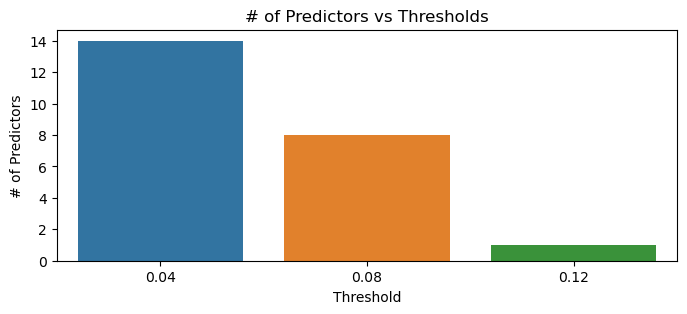

In [57]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.04', '0.08', '0.12']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

In [58]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Month + Madrid_temp + Barcelona_temp + Valencia_temp + Seville_temp + Bilbao_weather_id + hour + Year + Madrid_pressure + Day + Valencia_humidity + Seville_pressure + Madrid_clouds_all + Seville_clouds_all + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Madrid_humidity + Seville_humidity + Valencia_wind_deg


In [59]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df_new_new)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     72.64
Date:                Wed, 17 May 2023   Prob (F-statistic):          5.71e-273
Time:                        16:12:13   Log-Likelihood:                -86770.
No. Observations:                8763   AIC:                         1.736e+05
Df Residuals:                    8742   BIC:                         1.737e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.194e+06   1.48

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [117]:
# split data
X_all = df_new.drop('load_shortfall_3h',axis=1)
x = df_new[:len(df_train)].drop('load_shortfall_3h',axis=1)
y=df_new[:len(df_train)][['load_shortfall_3h']]
y_train = df_new[:len(df_train)][['load_shortfall_3h']]
X_train = df_new[:len(df_train)].drop('load_shortfall_3h',axis=1)

X_test = df_new[len(df_train):].drop('load_shortfall_3h',axis=1)


X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [65]:
X_var_train.describe()

,Month,Madrid_temp,Barcelona_temp,Valencia_temp,Seville_temp,Bilbao_weather_id,hour,Year,Madrid_pressure,Day,Valencia_humidity,Seville_pressure,Madrid_clouds_all,Seville_clouds_all,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Madrid_humidity,Seville_humidity,Valencia_wind_deg
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,6.524820,288.419439,289.855459,290.592152,293.978903,724.722362,10.498459,2016.000571,1010.316920,15.740157,65.247727,13.507246,19.473392,13.714748,190.544848,158.957511,43.469132,57.414717,62.658793,5.276389
std,3.447976,9.346796,6.528111,7.162274,7.920986,115.846537,6.874031,0.816054,22.198555,8.798664,19.262322,7.237267,28.053660,24.272482,89.077337,102.056299,32.551044,24.335396,22.621226,2.877642
min,1.000000,264.983333,270.816667,269.888000,272.063000,207.333333,0.000000,2015.000000,927.666667,1.000000,10.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.333333,8.333333,1.000000
25%,4.000000,281.404281,284.973443,285.150000,288.282917,700.333333,4.500000,2015.000000,1012.333333,8.000000,51.333333,7.000000,0.000000,0.000000,118.166667,73.333333,10.000000,36.333333,44.333333,3.000000
50%,7.000000,287.053333,289.416667,290.176667,293.323333,800.000000,9.000000,2016.000000,1017.333333,16.000000,67.000000,14.000000,0.000000,0.000000,200.000000,147.000000,45.000000,58.000000,65.666667,5.000000
75%,10.000000,295.154667,294.909000,296.056667,299.620333,801.666667,15.000000,2017.000000,1022.000000,23.000000,81.333333,20.000000,33.333333,20.000000,260.000000,234.000000,75.000000,78.666667,82.000000,8.000000
max,12.000000,313.133333,307.316667,310.426667,314.976667,804.000000,21.000000,2017.000000,1038.000000,31.000000,100.000000,25.000000,100.000000,97.333333,360.000000,359.333333,100.000000,100.000000,100.000000,10.000000


In [118]:
y_train.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [119]:
df_ans=y

print('mode')
print(df_ans['load_shortfall_3h'].mode())
print('median')
print(df_ans['load_shortfall_3h'].median())
print('mean')
print(df_ans['load_shortfall_3h'].mean())

mode
0      -537.333333
1      1203.666667
2      4144.000000
3      6089.666667
4      6401.333333
5      7144.666667
6      8413.000000
7      8480.666667
8      8937.333333
9      9139.666667
10    10028.000000
11    10271.666667
12    10927.000000
13    10940.000000
14    11321.333333
15    11322.333333
16    11475.333333
17    11817.000000
18    11839.666667
19    12249.333333
20    12308.666667
21    12529.000000
22    12637.000000
23    12640.333333
24    12704.000000
25    12716.666667
26    12785.333333
27    13364.666667
28    13563.666667
29    14108.333333
30    14254.666667
31    14376.666667
32    14431.000000
33    14585.333333
34    14612.666667
35    14809.000000
36    14867.666667
37    15145.666667
38    15855.666667
Name: load_shortfall_3h, dtype: float64
median
11114.6666666667
mean
10673.857611548558


In [77]:
X_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,hour
0,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,1,1,2018,0
1,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,1,1,2018,3
2,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,1,1,2018,6
3,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,1,1,2018,9
4,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,1,1,2018,12


In [120]:
# create targets and features dataset
from sklearn.model_selection import train_test_split

# x is the independent variable(s) and y is the dependent variable 'load_shortfall_3h'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.07)

x_corr_train = x_train[X_corr_names]
x_corr_test = x_test[X_corr_names]

x_var_train = x_train[X_var_names]
x_var_test = x_test[X_var_names]

In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_corr = LinearRegression()
lr_var = LinearRegression()

In [84]:
# create one or more ML models

lr.fit(x_train,y_train)
preds = lr.predict(x_test)

In [85]:
lr_corr.fit(x_corr_train,y_train)
corr_preds = lr_corr.predict(x_corr_test)

In [86]:
lr_var.fit(x_var_train,y_train)
var_preds = lr_var.predict(x_var_test)

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [88]:
# evaluate one or more ML models

def root_mse(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))

In [89]:
root_mse(y_test, preds)

4612.838089129962

In [90]:
r2_score(y_test, preds)

0.19856168177637756

In [91]:
root_mse(y_test, corr_preds)

4659.068061049798

In [92]:
r2_score(y_test, corr_preds)

0.1824171171619281

In [93]:
root_mse(y_test, var_preds)

4717.578616358421

In [94]:
r2_score(y_test, var_preds)

0.1617530667680499

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# define the model
rf_model = RandomForestRegressor(n_estimators=500)

# train the model
rf_model.fit(x_train, y_train)

# make predictions on the test data
rf_y_pred = rf_model.predict(x_test)

# evaluate the model
r2 = rf_model.score(x_test, y_test)
print('RMSE:', root_mse(y_test,rf_y_pred))
print('R2 score:', r2)


C:\Users\ifeoluwa.ayodele\AppData\Local\Temp\ipykernel_226712\4173290563.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RMSE: 2850.179738911713
R2 score: 0.6940304711587904


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# define the model
rf_model = RandomForestRegressor(n_estimators=500)

# train the model
rf_model.fit(x_var_train,y_train)

# make predictions on the test data
rf_y_pred = rf_model.predict(x_var_test)

# evaluate the model
r2 = rf_model.score(x_var_test, y_test)
print('RMSE:', root_mse(y_test,rf_y_pred))
print('R2 score:', r2)

C:\Users\ifeoluwa.ayodele\AppData\Local\Temp\ipykernel_226712\2399591520.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_var_train,y_train)


RMSE: 2944.9950766538527
R2 score: 0.6733348331972766


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# define the model
rf_model = RandomForestRegressor(n_estimators=500)

# train the model
rf_model.fit(x_corr_train,y_train)

# make predictions on the test data
rf_y_pred = rf_model.predict(x_corr_test)

# evaluate the model
r2 = rf_model.score(x_corr_test, y_test)
print('RMSE:', root_mse(y_test,rf_y_pred))
print('R2 score:', r2)

C:\Users\ifeoluwa.ayodele\AppData\Local\Temp\ipykernel_226712\3683805327.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_corr_train,y_train)


RMSE: 2842.3824391346625
R2 score: 0.6957022764494669


In [124]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# define the model
gb_model = GradientBoostingRegressor(n_estimators=500, max_depth=7)

# train the model
gb_model.fit(x_train, y_train)

# make predictions on the test data
gb_y_pred = gb_model.predict(x_test)

# evaluate the model
r2 = gb_model.score(x_test, y_test)
print('RMSE:', root_mse(y_test,gb_y_pred))
print('R2 score:', r2)


C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 2715.94799935325
R2 score: 0.7186960620612499


In [99]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# define the model
gb_model = GradientBoostingRegressor(n_estimators=500, max_depth=7)

# train the model
gb_model.fit(x_var_train,y_train)

# make predictions on the test data
gb_y_pred = gb_model.predict(x_var_test)

# evaluate the model
r2 = gb_model.score(x_var_test, y_test)
print('RMSE:', root_mse(y_test,gb_y_pred))
print('R2 score:', r2)

C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 2771.1099338959248
R2 score: 0.7107714294454808


In [127]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# define the model
gb_model = GradientBoostingRegressor(n_estimators=500, max_depth=7)

# train the model
gb_model.fit(x_corr_train,y_train)

# make predictions on the test data
gb_y_pred = gb_model.predict(x_corr_test)

# evaluate the model
r2 = gb_model.score(x_corr_test, y_test)
print('RMSE:', root_mse(y_test,gb_y_pred))
print('R2 score:', r2)


C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 2652.094286667027
R2 score: 0.7317678499734408


In [101]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Apply feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Step 2: Create and train the Lasso model
alpha = 0.1  # regularization parameter (alpha = 0 gives ordinary least squares)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

# Step 3: Make predictions
l_pred = lasso.predict(X_test_scaled)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, l_pred)
rmse = np.sqrt(mse)
r2 = lasso.score(x_test, y_test)
print("Root Mean Squared Error:", rmse)
print('R2 score:', r2)

Root Mean Squared Error: 4612.091324865333
R2 score: -69775.35355927699


C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.276e+10, tolerance: 2.223e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [102]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Apply feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_var_train)
X_test_scaled = scaler.transform(x_var_test)

# Step 2: Create and train the Lasso model
alpha = 0.1  # regularization parameter (alpha = 0 gives ordinary least squares)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

# Step 3: Make predictions
l_pred = lasso.predict(X_test_scaled)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, l_pred)
rmse = np.sqrt(mse)
r2 = lasso.score(x_var_test, y_test)
print("Root Mean Squared Error:", rmse)
print('R2 score:', r2)

Root Mean Squared Error: 4717.5891939629755
R2 score: -48757.57580627613


C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [103]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Apply feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_corr_train)
X_test_scaled = scaler.transform(x_corr_test)

# Step 2: Create and train the Lasso model
alpha = 0.1  # regularization parameter (alpha = 0 gives ordinary least squares)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

# Step 3: Make predictions
l_pred = lasso.predict(X_test_scaled)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, l_pred)
rmse = np.sqrt(mse)
r2 = lasso.score(x_corr_test, y_test)
print("Root Mean Squared Error:", rmse)
print('R2 score:', r2)

C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Root Mean Squared Error: 4659.1001953540135
R2 score: -112393.66325713295


In [104]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Apply feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Step 2: Create and train the Ridge model
alpha = 0.1  # regularization parameter (alpha = 0 gives ordinary least squares)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)

# Step 3: Make predictions
r_pred = ridge.predict(X_test_scaled)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, r_pred)
rmse = np.sqrt(mse)
r2 = ridge.score(x_test, y_test)
print("Root Mean Squared Error:", rmse)
print('R2 score:', r2)

Root Mean Squared Error: 4612.635668970303
R2 score: -70882.2681025774


C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [105]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Apply feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_corr_train)
X_test_scaled = scaler.transform(x_corr_test)

# Step 2: Create and train the Ridge model
alpha = 0.1  # regularization parameter (alpha = 0 gives ordinary least squares)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)

# Step 3: Make predictions
r_pred = ridge.predict(X_test_scaled)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, r_pred)
rmse = np.sqrt(mse)
r2 = ridge.score(x_corr_test, y_test)
print("Root Mean Squared Error:", rmse)
print('R2 score:', r2)

Root Mean Squared Error: 4659.065036334817
R2 score: -112722.97916252568


C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [106]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Apply feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Step 2: Create and train the Ridge model
alpha = 0.1  # regularization parameter (alpha = 0 gives ordinary least squares)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)

# Step 3: Make predictions
r_pred = ridge.predict(X_test_scaled)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, r_pred)
rmse = np.sqrt(mse)
r2 = ridge.score(x_test, y_test)
print("Root Mean Squared Error:", rmse)
print('R2 score:', r2)

Root Mean Squared Error: 4612.635668970303
R2 score: -70882.2681025774


C:\Users\ifeoluwa.ayodele\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [125]:
# Compare model performance (Best three Models)
compare={'r2 score for linear regression':r2_score(y_test,preds),
        'r2 score for Random Forest Regression':r2_score(y_test,rf_y_pred),
        'r2 score for Gradient boost regressor':r2_score(y_test,gb_y_pred),
        }
compare

{'r2 score for linear regression': -0.25701085067523577,
 'r2 score for Random Forest Regression': -0.6603013557676467,
 'r2 score for Gradient boost regressor': 0.7186960620612499}

In [108]:
# Choose best model and motivate why it is the best choice
'''
Gradient boost regressor is the best model because it has the highest r2 score
'''

'\nGradient boost regressor is the best model because it has the highest r2 score\n'

In [109]:
x_train = df_new[:len(df_train)].drop('load_shortfall_3h', axis=1)
x_test = df_new[len(df_train):].drop('load_shortfall_3h', axis=1)

In [ ]:
gb_model.fit(X_corr_train, y)
gb_y_pred = gb_model.predict(X_corr_test)

In [ ]:
daf=pd.DataFrame(gb_y_pred,columns=['load_shortfall_3h'])
daf.tail()

In [ ]:
output=pd.DataFrame({"time": df_test['time']})
submission = output.join(daf)
submission.to_csv("Team RR155.csv", index=False)

In [ ]:
dfs= pd.read_csv('Team RR155.csv')
dfs.tail()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic